In [ ]:
import torch
from huggingface_hub import hf_hub_download

In [ ]:
pip install torch huggingface_hub

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
print(device)

cuda


In [ ]:
from huggingface_hub import snapshot_download
import os
import torch

repo_id = "Haitao999/things-eeg"


In [ ]:
from huggingface_hub import snapshot_download
import os, torch

local_dir = snapshot_download(
    repo_id="Haitao999/things-eeg",
    repo_type="dataset",
    allow_patterns=[
        "Preprocessed_data_250Hz_whiten/sub-01/*"
    ]
)

print("Downloaded to:", local_dir)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

Preprocessed_data_250Hz_whiten/sub-01/tr(…):   0%|          | 0.00/2.11G [00:00<?, ?B/s]

Preprocessed_data_250Hz_whiten/sub-01/te(…):   0%|          | 0.00/509M [00:00<?, ?B/s]

Downloaded to: /root/.cache/huggingface/hub/datasets--Haitao999--things-eeg/snapshots/f45948e37fb83c3bc415ffd5868f5a0c98c62015


In [ ]:
train_path = os.path.join(
    local_dir,
    "Preprocessed_data_250Hz_whiten",
    "sub-01",
    "train.pt"
)

In [ ]:
train_data = torch.load(
    train_path,
    map_location="cpu",
    weights_only=False
)

In [ ]:
print(type(train_data))

<class 'dict'>


In [ ]:
if isinstance(train_data, dict):
    for k, v in train_data.items():
        print(k, type(v), getattr(v, "shape", None))

eeg <class 'numpy.ndarray'> (16540, 4, 63, 250)
label <class 'numpy.ndarray'> (16540, 4)
img <class 'numpy.ndarray'> (16540, 4)
text <class 'numpy.ndarray'> (16540, 4)
session <class 'numpy.ndarray'> (16540, 4)
ch_names <class 'list'> None
times <class 'numpy.ndarray'> (300,)


In [ ]:
import numpy as np

eeg = train_data["eeg"]
labels = train_data["label"]

print("EEG dtype:", eeg.dtype)
print("Labels dtype:", labels.dtype)

print("EEG min/max:", eeg.min(), eeg.max())
print("EEG mean/std:", eeg.mean(), eeg.std())

EEG dtype: float16
Labels dtype: int64
EEG min/max: -519.5 132.5


/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:164: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)


EEG mean/std: -0.00995 inf


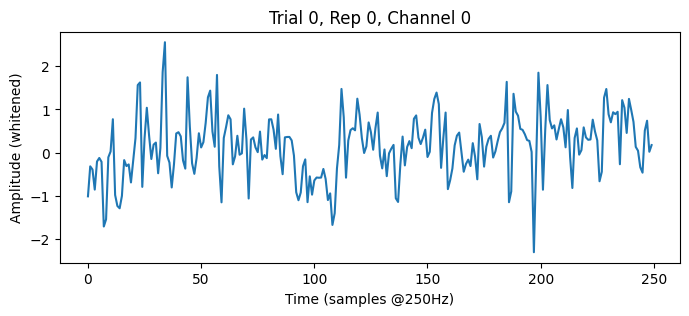

In [ ]:
import matplotlib.pyplot as plt

trial = 0
rep = 0
ch = 0

signal = eeg[trial, rep, ch]

plt.figure(figsize=(8, 3))
plt.plot(signal)
plt.title(f"Trial {trial}, Rep {rep}, Channel {ch}")
plt.xlabel("Time (samples @250Hz)")
plt.ylabel("Amplitude (whitened)")
plt.show()

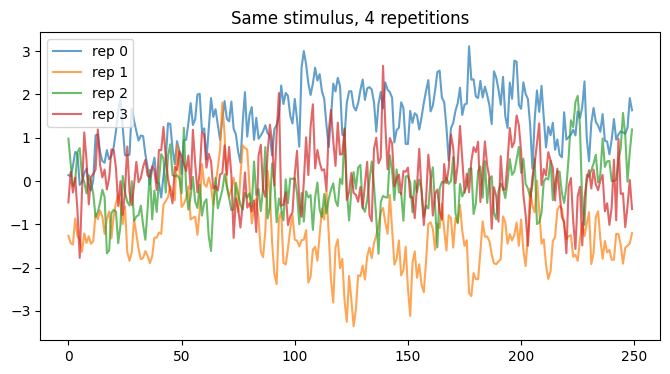

In [ ]:
trial = 0
ch = 10

plt.figure(figsize=(8, 4))
for rep in range(4):
    plt.plot(eeg[trial, rep, ch], label=f"rep {rep}", alpha=0.7)

plt.legend()
plt.title("Same stimulus, 4 repetitions")
plt.show()

In [ ]:
eeg32 = eeg.astype("float32")

print("Mean:", eeg32.mean())
print("Std:", eeg32.std())
print("Min/Max:", eeg32.min(), eeg32.max())

Mean: -0.009950604
Std: 1.1234599
Min/Max: -519.5 132.5


In [ ]:
print("Any NaNs:", np.isnan(eeg).any())
print("Any infs:", np.isinf(eeg).any())

Any NaNs: False
Any infs: False


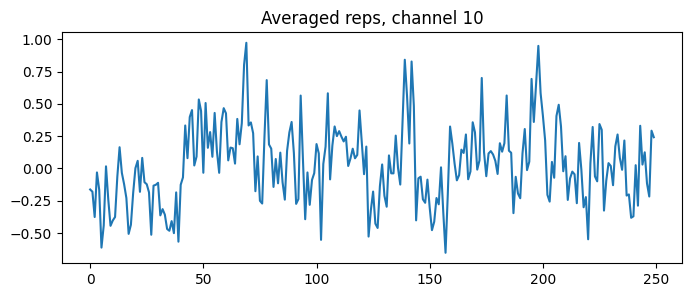

In [ ]:
avg_eeg = eeg.mean(axis=1)  # (16540, 63, 250)

plt.figure(figsize=(8,3))
plt.plot(avg_eeg[0, 10])
plt.title("Averaged reps, channel 10")
plt.show()

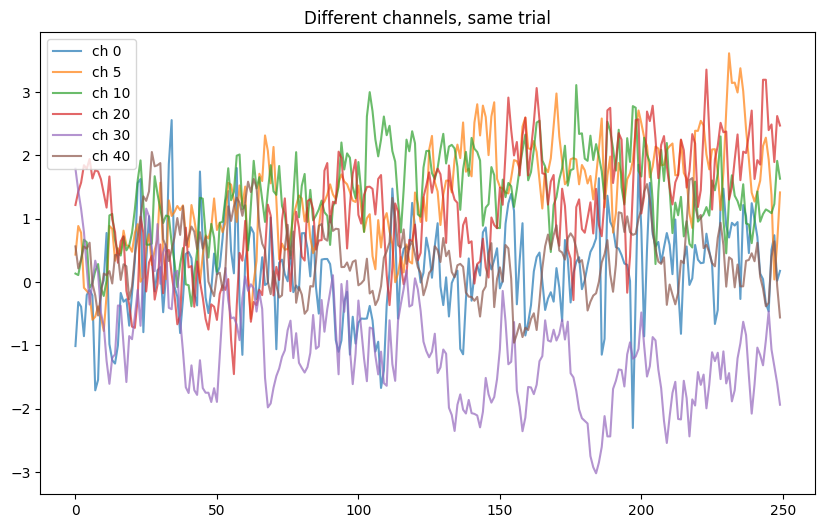

In [ ]:
trial = 0
rep = 0

plt.figure(figsize=(10, 6))
for ch in [0, 5, 10, 20, 30, 40]:
    plt.plot(eeg[trial, rep, ch], label=f"ch {ch}", alpha=0.7)

plt.legend()
plt.title("Different channels, same trial")
plt.show()

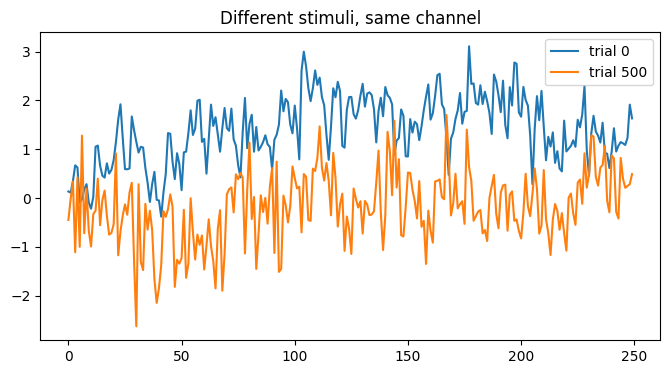

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(eeg[0, 0, 10], label="trial 0")
plt.plot(eeg[500, 0, 10], label="trial 500")
plt.legend()
plt.title("Different stimuli, same channel")
plt.show()

In [ ]:

import numpy as np

eeg = train_data["eeg"].astype(np.float32)  # (N, R, C, T)
labels = train_data["label"]                # (N, R)
ch_names = train_data["ch_names"]

In [ ]:
N, R, C, T = eeg.shape
print("eeg shape:", eeg.shape)

eeg shape: (16540, 4, 63, 250)


In [ ]:

for k in ["label", "img", "text", "session"]:
    arr = train_data[k]
    print(k, arr.shape)


label (16540, 4)
img (16540, 4)
text (16540, 4)
session (16540, 4)


In [ ]:
label_consistency = np.mean(
    np.all(labels == labels[:, [0]], axis=1)
)


In [ ]:
print(label_consistency)

1.0


In [ ]:
trial_avg = eeg.mean(axis=1)  # (N, C, T)

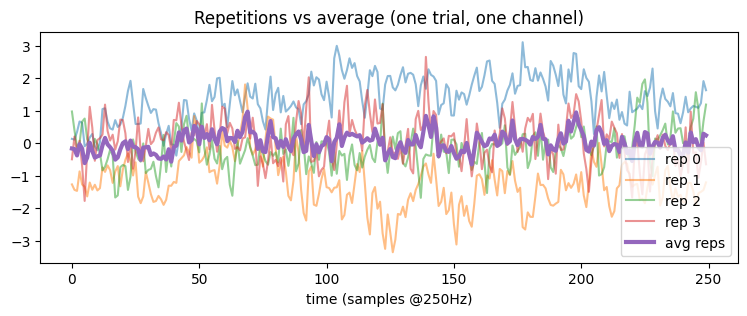

In [ ]:
import matplotlib.pyplot as plt

trial = 0
ch = 10

plt.figure(figsize=(9,3))
for r in range(4):
    plt.plot(eeg[trial, r, ch], alpha=0.5, label=f"rep {r}")
plt.plot(trial_avg[trial, ch], linewidth=3, label="avg reps")
plt.legend()
plt.title("Repetitions vs average (one trial, one channel)")
plt.xlabel("time (samples @250Hz)")
plt.show()

In [ ]:
# flatten trials and reps: (N*R, C, T)
flat = eeg.reshape(-1, C, T)

var_t = flat.var(axis=0)      # (C, T) variance over samples
mean_var_t = var_t.mean(axis=0)  # (T,) average across channels

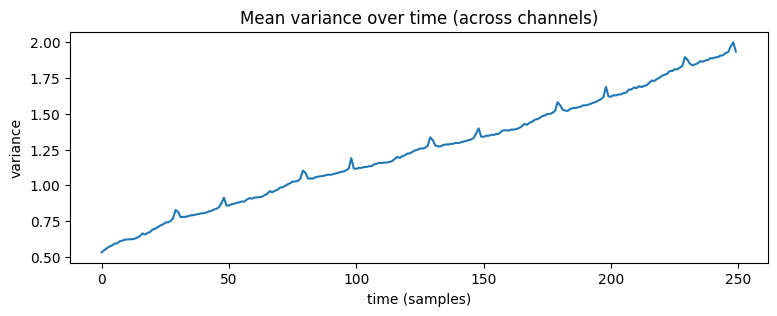

In [ ]:

plt.figure(figsize=(9,3))
plt.plot(mean_var_t)
plt.title("Mean variance over time (across channels)")
plt.xlabel("time (samples)")
plt.ylabel("variance")
plt.show()

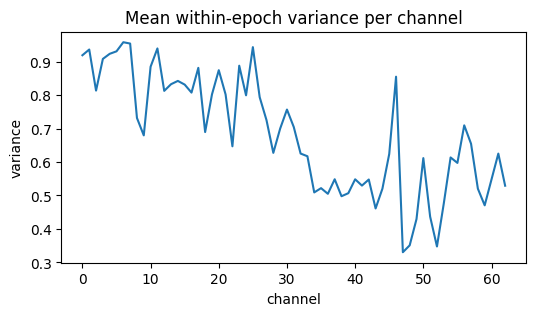

In [ ]:
# variance within each epoch over time, then average
within_var = eeg.var(axis=3)      # (N, R, C)
mean_within = within_var.mean(axis=(0,1))  # (C,)

plt.figure(figsize=(6,3))
plt.plot(mean_within)
plt.title("Mean within-epoch variance per channel")
plt.xlabel("channel")
plt.ylabel("variance")
plt.show()


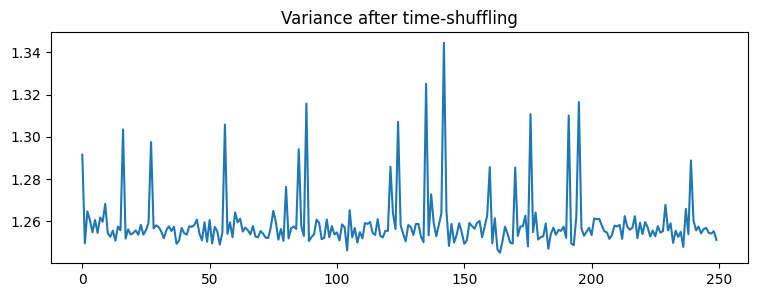

In [ ]:
shuffled = eeg.copy()
for i in range(shuffled.shape[0]):
    for r in range(4):
        for c in range(63):
            np.random.shuffle(shuffled[i,r,c])

flat_s = shuffled.reshape(-1, 63, 250)
var_s = flat_s.var(axis=0).mean(axis=0)

plt.figure(figsize=(9,3))
plt.plot(var_s)
plt.title("Variance after time-shuffling")
plt.show()

In [ ]:
import numpy as np

eeg = train_data["eeg"].astype(np.float32)
labels = train_data["label"]

# choose one channel and one repetition
ch = 10
rep = 0

In [ ]:
def corr(a, b):
    a = (a - a.mean()) / (a.std() + 1e-8)
    b = (b - b.mean()) / (b.std() + 1e-8)
    return np.mean(a * b)

In [ ]:
N = eeg.shape[0]
trials = np.random.choice(N, size=200, replace=False)

same = []
diff = []

for t in trials:
    # same stimulus: rep 0 vs rep 1
    same.append(
        corr(eeg[t, 0, ch], eeg[t, 1, ch])
    )

    # different stimulus: random other trial
    t2 = np.random.randint(0, N)
    diff.append(
        corr(eeg[t, 0, ch], eeg[t2, 1, ch])
    )

print("Mean correlation (same stimulus):", np.mean(same))
print("Mean correlation (different stimulus):", np.mean(diff))

Mean correlation (same stimulus): -0.008423055
Mean correlation (different stimulus): -0.019295538


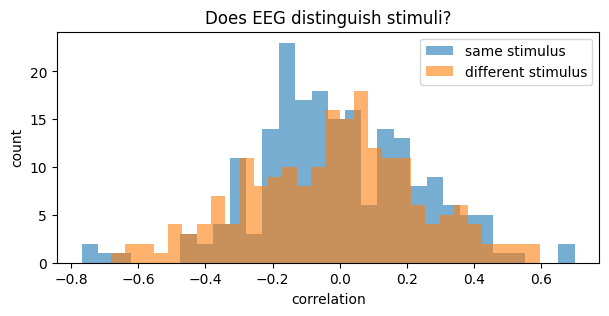

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,3))
plt.hist(same, bins=30, alpha=0.6, label="same stimulus")
plt.hist(diff, bins=30, alpha=0.6, label="different stimulus")
plt.legend()
plt.xlabel("correlation")
plt.ylabel("count")
plt.title("Does EEG distinguish stimuli?")
plt.show()


In [ ]:
chan_var = flat.var(axis=(0,2))  # variance over samples and time => (C,)

# show top/bottom channels
idx_sorted = np.argsort(chan_var)
print("Lowest variance channels:")
for i in idx_sorted[:5]:
    print(i, ch_names[i] if ch_names else i, chan_var[i])

print("\nHighest variance channels:")
for i in idx_sorted[-5:]:
    print(i, ch_names[i] if ch_names else i, chan_var[i])


Lowest variance channels:
47 P5 0.45989555
52 P4 0.54660374
48 P3 0.5526257
53 P6 0.6468916
44 TP8 0.71625847

Highest variance channels:
1 Fp2 1.9467471
4 AFz 2.1487596
3 AF3 2.2549787
10 F1 2.3640852
11 F2 2.5123343


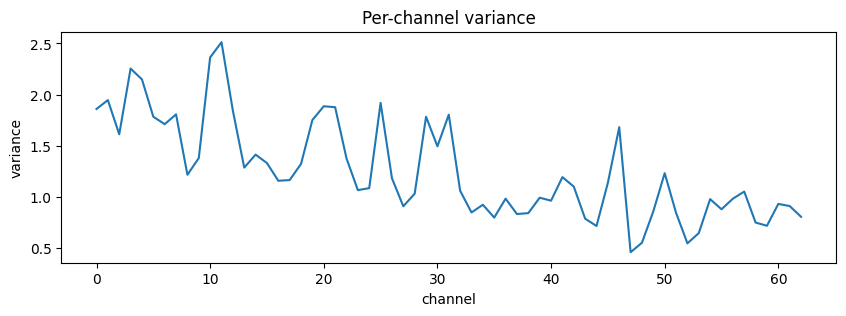

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(chan_var)
plt.title("Per-channel variance")
plt.xlabel("channel")
plt.ylabel("variance")
plt.show()

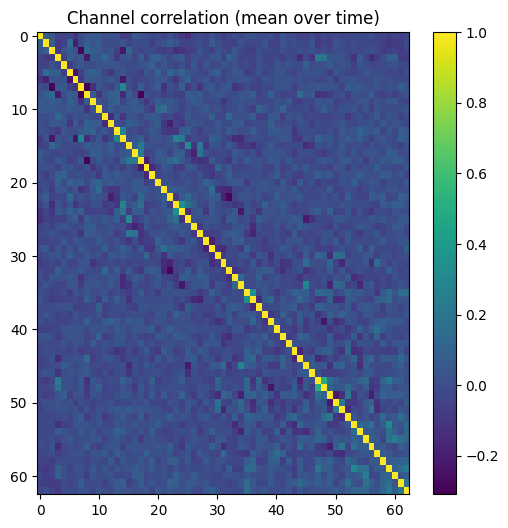

In [ ]:
# subsample a few thousand epochs to keep compute light
idx = np.random.choice(flat.shape[0], size=2000, replace=False)
sub = flat[idx]  # (2000, C, T)

# collapse time by averaging -> one value per channel per epoch
sub_feat = sub.mean(axis=2)  # (2000, C)

corr = np.corrcoef(sub_feat, rowvar=False)  # (C, C)

plt.figure(figsize=(6,6))
plt.imshow(corr, aspect="auto")
plt.colorbar()
plt.title("Channel correlation (mean over time)")
plt.show()

mean corr (same stimulus reps): 0.033885803
mean corr (different stimulus): 0.027816689


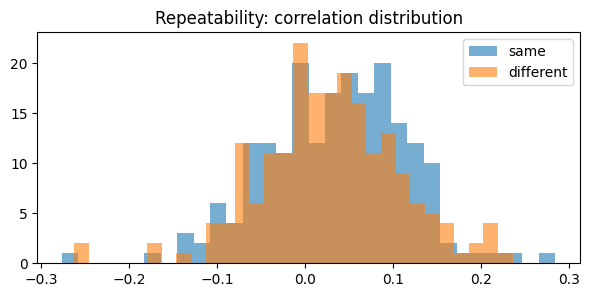

In [ ]:
def corr(a, b):
    a = a.reshape(-1)
    b = b.reshape(-1)
    a = (a - a.mean()) / (a.std() + 1e-8)
    b = (b - b.mean()) / (b.std() + 1e-8)
    return (a * b).mean()

trials = np.random.choice(N, size=200, replace=False)

same = []
diff = []

for t in trials:
    same.append(corr(eeg[t,0], eeg[t,1]))
    t2 = np.random.randint(0, N)
    diff.append(corr(eeg[t,0], eeg[t2,1]))

print("mean corr (same stimulus reps):", np.mean(same))
print("mean corr (different stimulus):", np.mean(diff))

plt.figure(figsize=(7,3))
plt.hist(same, bins=30, alpha=0.6, label="same")
plt.hist(diff, bins=30, alpha=0.6, label="different")
plt.legend()
plt.title("Repeatability: correlation distribution")
plt.show()


In [ ]:
eeg = train_data["eeg"].astype("float32")

# average over repetitions
eeg_avg = eeg.mean(axis=1)   # shape: (16540, 63, 250)

In [ ]:
def corr(a, b):
    a = (a - a.mean()) / (a.std() + 1e-8)
    b = (b - b.mean()) / (b.std() + 1e-8)
    return (a * b).mean()

In [ ]:
import numpy as np

ch = 10
N = eeg_avg.shape[0]
trials = np.random.choice(N, size=200, replace=False)

same = []
diff = []

for t in trials:
    # same stimulus: averaged reps vs itself (sanity baseline)
    same.append(
        corr(eeg_avg[t, ch], eeg_avg[t, ch])
    )

    # different stimulus
    t2 = np.random.randint(0, N)
    diff.append(
        corr(eeg_avg[t, ch], eeg_avg[t2, ch])
    )

print("Mean corr (same stimulus):", np.mean(same))
print("Mean corr (different stimulus):", np.mean(diff))

Mean corr (same stimulus): 1.0
Mean corr (different stimulus): 0.0068392437


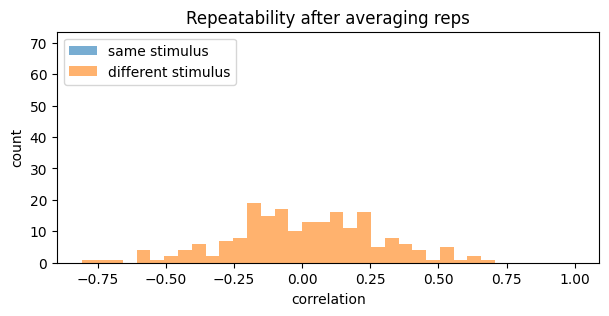

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,3))
plt.hist(same, bins=30, alpha=0.6, label="same stimulus")
plt.hist(diff, bins=30, alpha=0.6, label="different stimulus")
plt.legend()
plt.xlabel("correlation")
plt.ylabel("count")
plt.title("Repeatability after averaging reps")
plt.show()

In [ ]:
eeg = train_data["eeg"].astype("float32")

# split reps into two halves
eeg_a = eeg[:, :2].mean(axis=1)   # reps 0,1
eeg_b = eeg[:, 2:].mean(axis=1)   # reps 2,3

In [ ]:
def corr(a, b):
    a = (a - a.mean()) / (a.std() + 1e-8)
    b = (b - b.mean()) / (b.std() + 1e-8)
    return (a * b).mean()

ch = 10
N = eeg.shape[0]
trials = np.random.choice(N, size=200, replace=False)

same = []
diff = []

for t in trials:
    # same stimulus, independent halves
    same.append(
        corr(eeg_a[t, ch], eeg_b[t, ch])
    )

    # different stimulus
    t2 = np.random.randint(0, N)
    diff.append(
        corr(eeg_a[t, ch], eeg_b[t2, ch])
    )

print("Mean corr (same stimulus):", np.mean(same))
print("Mean corr (different stimulus):", np.mean(diff))

Mean corr (same stimulus): 0.0056666
Mean corr (different stimulus): 0.0019514185


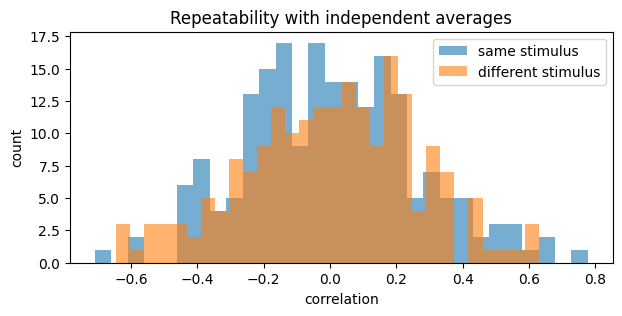

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,3))
plt.hist(same, bins=30, alpha=0.6, label="same stimulus")
plt.hist(diff, bins=30, alpha=0.6, label="different stimulus")
plt.legend()
plt.xlabel("correlation")
plt.ylabel("count")
plt.title("Repeatability with independent averages")
plt.show()

In [ ]:
signal = eeg_a[t, ch]


In [ ]:
chs = np.arange(10)   # channels 0–9

In [ ]:
def corr(a, b):
    a = (a - a.mean()) / (a.std() + 1e-8)
    b = (b - b.mean()) / (b.std() + 1e-8)
    return (a * b).mean()

N = eeg_a.shape[0]
trials = np.random.choice(N, size=200, replace=False)

same = []
diff = []

for t in trials:
    # combine channels by averaging
    sig_a = eeg_a[t, chs].mean(axis=0)
    sig_b = eeg_b[t, chs].mean(axis=0)

    same.append(corr(sig_a, sig_b))

    t2 = np.random.randint(0, N)
    sig_b2 = eeg_b[t2, chs].mean(axis=0)
    diff.append(corr(sig_a, sig_b2))

print("Mean corr (same stimulus):", np.mean(same))
print("Mean corr (different stimulus):", np.mean(diff))

Mean corr (same stimulus): 0.0022333032
Mean corr (different stimulus): 0.021204839


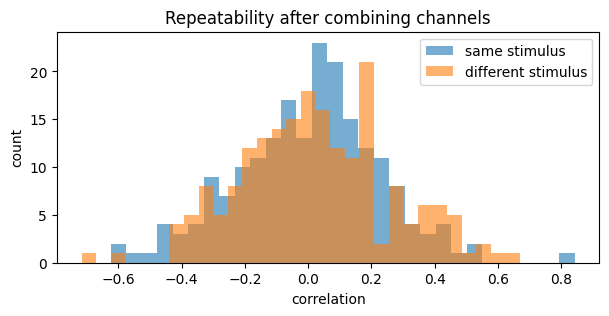

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,3))
plt.hist(same, bins=30, alpha=0.6, label="same stimulus")
plt.hist(diff, bins=30, alpha=0.6, label="different stimulus")
plt.legend()
plt.xlabel("correlation")
plt.ylabel("count")
plt.title("Repeatability after combining channels")
plt.show()

In [ ]:
signal = eeg_a[t, chs].mean(axis=0)

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)

Device: cuda


In [ ]:
eeg = train_data["eeg"].astype("float32")   # (N, 4, 63, 250)
labels = train_data["label"][:, 0]          # (N,)

# average repetitions FIRST (denoising)
eeg_avg = eeg.mean(axis=1)                  # (N, 63, 250)

X = torch.from_numpy(eeg_avg)               # torch tensor
y = torch.from_numpy(labels).long()

print("X:", X.shape, "y:", y.shape)

X: torch.Size([16540, 63, 250]) y: torch.Size([16540])


In [ ]:
# baseline: mean over time → mean over channels
baseline_repr = X.mean(dim=2).mean(dim=1).numpy()  # (N,)

In [ ]:
class ChannelTimeMLP(nn.Module):
    def __init__(self, T=250, D=64):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(T, 128),
            nn.GELU(),
            nn.Linear(128, D)
        )

    def forward(self, x):
        # x: (B, C, T)
        B, C, T = x.shape
        x = x.reshape(B * C, T)
        z = self.net(x)
        z = z.reshape(B, C, -1)  # (B, C, D)
        return z

In [ ]:
class Stage1Encoder(nn.Module):
    def __init__(self, T=250, D=64):
        super().__init__()
        self.embed = ChannelTimeMLP(T, D)
        self.norm = nn.LayerNorm(D)

    def forward(self, x):
        z = self.embed(x)        # (B, C, D)
        z = z.mean(dim=1)        # TEMP pooling across channels
        z = self.norm(z)
        return z


In [ ]:
def supervised_contrastive_loss(z, y, temperature=0.1):
    z = F.normalize(z, dim=1)
    sim = z @ z.T / temperature

    y = y.unsqueeze(1)
    mask = (y == y.T).float()

    exp_sim = torch.exp(sim)
    log_prob = sim - torch.log(exp_sim.sum(dim=1, keepdim=True))

    loss = -(mask * log_prob).sum() / mask.sum()
    return loss

In [ ]:
model = Stage1Encoder(D=64).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-3)

X_t = X.to(device)
y_t = y.to(device)

batch_size = 128
epochs = 8


In [ ]:
for epoch in range(epochs):
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i+batch_size]
        xb = X_t[idx]
        yb = y_t[idx]

        z = model(xb)
        loss = supervised_contrastive_loss(z, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}: loss = {total_loss:.2f}")

Epoch 1: loss = 89.39
Epoch 2: loss = 82.08
Epoch 3: loss = 82.47
Epoch 4: loss = 75.98
Epoch 5: loss = 76.81
Epoch 6: loss = 73.98
Epoch 7: loss = 73.56
Epoch 8: loss = 70.17


In [ ]:
for epoch in range(epochs):
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i+batch_size]
        xb = X_t[idx]
        yb = y_t[idx]

        z = model(xb)
        loss = supervised_contrastive_loss(z, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}: loss = {total_loss:.2f}")

Epoch 1: loss = 71.24
Epoch 2: loss = 67.65
Epoch 3: loss = 69.26
Epoch 4: loss = 67.95
Epoch 5: loss = 67.60
Epoch 6: loss = 65.68
Epoch 7: loss = 65.58
Epoch 8: loss = 67.54


In [ ]:
for epoch in range(epochs):
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i+batch_size]
        xb = X_t[idx]
        yb = y_t[idx]

        z = model(xb)
        loss = supervised_contrastive_loss(z, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}: loss = {total_loss:.2f}")

Epoch 1: loss = 60.30
Epoch 2: loss = 64.13
Epoch 3: loss = 64.13
Epoch 4: loss = 64.49
Epoch 5: loss = 65.61
Epoch 6: loss = 65.51
Epoch 7: loss = 65.28
Epoch 8: loss = 65.02


In [ ]:
for epoch in range(epochs):
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i+batch_size]
        xb = X_t[idx]
        yb = y_t[idx]

        z = model(xb)
        loss = supervised_contrastive_loss(z, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}: loss = {total_loss:.2f}")

Epoch 1: loss = 64.63
Epoch 2: loss = 57.89
Epoch 3: loss = 61.04
Epoch 4: loss = 63.54
Epoch 5: loss = 62.27
Epoch 6: loss = 59.56
Epoch 7: loss = 60.97
Epoch 8: loss = 61.78


In [ ]:
# extract embeddings for the whole dataset
model.eval()
with torch.no_grad():
    Z = model(X_t).cpu().numpy()

In [ ]:
np.std(Z, axis=0).mean()


np.float32(0.95227665)

In [ ]:
same_diff_test(Z, labels)

NameError: name 'same_diff_test' is not defined

In [ ]:
import random
import numpy as np

def cosine(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b) + 1e-8)

def same_diff_test(repr_vecs, labels, n=300):
    """
    repr_vecs: (N, D) numpy array of embeddings
    labels:    (N,) numpy array of stimulus IDs
    n:         number of random pairs to test
    """
    idx = np.random.choice(len(labels), n, replace=False)
    same, diff = [], []

    for i in idx:
        # same stimulus (self-similarity upper bound)
        same.append(cosine(repr_vecs[i], repr_vecs[i]))

        # different stimulus
        j = random.randint(0, len(labels) - 1)
        diff.append(cosine(repr_vecs[i], repr_vecs[j]))

    return np.mean(same), np.mean(diff)

In [ ]:
print("Baseline same/diff:",
      same_diff_test(baseline_repr.reshape(-1, 1), labels))

Baseline same/diff: (np.float32(0.9950885), np.float32(0.066629864))


In [ ]:
print("Stage-1 same/diff:",
      same_diff_test(Z, labels))

Stage-1 same/diff: (np.float32(1.0), np.float32(0.21254988))


In [ ]:
def same_label_diff_label_test(Z, labels, n=1000):
    same, diff = [], []
    N = len(labels)

    # build index by label
    label_to_indices = {}
    for i, lab in enumerate(labels):
        label_to_indices.setdefault(lab, []).append(i)

    valid_labels = [lab for lab, idxs in label_to_indices.items() if len(idxs) > 1]

    for _ in range(n):
        # SAME label (different samples)
        lab = random.choice(valid_labels)
        i, j = random.sample(label_to_indices[lab], 2)
        same.append(cosine(Z[i], Z[j]))

        # DIFFERENT label
        i = random.randint(0, N - 1)
        j = random.randint(0, N - 1)
        while labels[i] == labels[j]:
            j = random.randint(0, N - 1)
        diff.append(cosine(Z[i], Z[j]))

    return np.mean(same), np.mean(diff)

In [ ]:
print("Stage-1 same/diff:", same_label_diff_label_test(Z, labels))

Stage-1 same/diff: (np.float32(0.3589778), np.float32(0.053911787))


In [ ]:
eeg_avg.shape

(16540, 63, 250)

In [ ]:
X.shape

torch.Size([16540, 63, 250])

In [ ]:
for epoch in range(epochs):
    model.train()
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i+batch_size]
        xb = X_t[idx]
        yb = y_t[idx]

        z = model(xb)
        loss = supervised_contrastive_loss(z, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}: loss = {total_loss:.2f}")

Epoch 1: loss = 65.13
Epoch 2: loss = 63.38
Epoch 3: loss = 67.05
Epoch 4: loss = 63.10
Epoch 5: loss = 67.84
Epoch 6: loss = 67.28
Epoch 7: loss = 68.28
Epoch 8: loss = 62.60


In [ ]:
model.eval()
with torch.no_grad():
    Z = model(X_t).cpu().numpy()

In [ ]:
print("Stage-1 same/diff:", same_label_diff_label_test(Z, labels))

Stage-1 same/diff: (np.float32(0.3764876), np.float32(0.058504146))


In [ ]:
def anchor_same_diff_test(Z, labels, n=1000):
    same, diff = [], []
    N = len(labels)

    for _ in range(n):
        i = random.randint(0, N-1)
        label = labels[i]

        same_idx = random.choice([j for j in range(N) if labels[j] == label and j != i])
        diff_idx = random.choice([j for j in range(N) if labels[j] != label])

        same.append(cosine(Z[i], Z[same_idx]))
        diff.append(cosine(Z[i], Z[diff_idx]))

    return np.mean(same), np.mean(diff)

In [ ]:
same_mean, diff_mean = anchor_same_diff_test(Z, labels, n=1000)

print("Anchor-based same/diff:")
print("  same-label mean cosine:", same_mean)
print("  diff-label mean cosine:", diff_mean)

Anchor-based same/diff:
  same-label mean cosine: 0.35863984
  diff-label mean cosine: 0.049672376


In [ ]:
print("Randomized labels control:")
shuffled = labels.copy()
np.random.shuffle(shuffled)
print(anchor_same_diff_test(Z, shuffled))

Randomized labels control:
(np.float32(0.049597178), np.float32(0.07650369))


In [ ]:
class Stage1Encoder(nn.Module):
    def __init__(self, T=250, C=63, D=64, out_dim=128):
        super().__init__()
        self.embed = ChannelTimeMLP(T, D)
        self.proj = nn.Sequential(
            nn.Linear(C * D, out_dim),
            nn.LayerNorm(out_dim)
        )

    def forward(self, x):
        # x: (B, C, T)
        z = self.embed(x)            # (B, C, D)
        z = z.reshape(z.size(0), -1) # (B, C*D)  <-- FLATTEN
        z = self.proj(z)             # (B, out_dim)
        return z

In [ ]:
np.mean(np.linalg.norm(Z, axis=1))


np.float32(11.283869)

In [ ]:
np.std(Z, axis=0).mean()

np.float32(0.94192773)

In [ ]:
unique_labels = np.unique(labels)
print(len(unique_labels))

1654


In [ ]:
len(labels)

16540

In [ ]:
import numpy as np

# subsample for visualization
np.random.seed(0)
idx = np.random.choice(len(Z), size=2000, replace=False)

Z_vis = Z[idx]
labels_vis = labels[idx]

In [ ]:
!pip install umap-learn

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


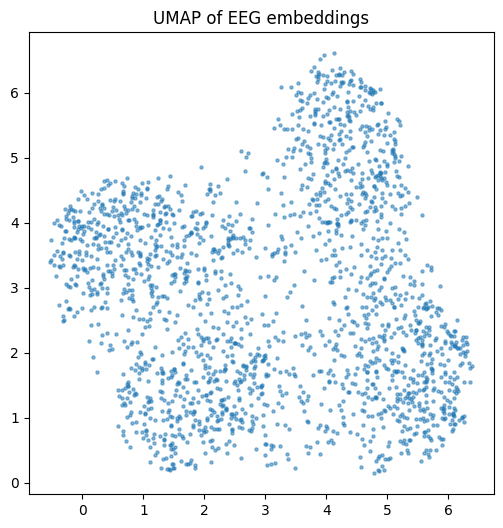

In [ ]:
import umap

umap_model = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    metric="cosine",
    random_state=0
)

Z_umap = umap_model.fit_transform(Z_vis)

plt.figure(figsize=(6, 6))
plt.scatter(Z_umap[:, 0], Z_umap[:, 1], s=5, alpha=0.5)
plt.title("UMAP of EEG embeddings")
plt.show()

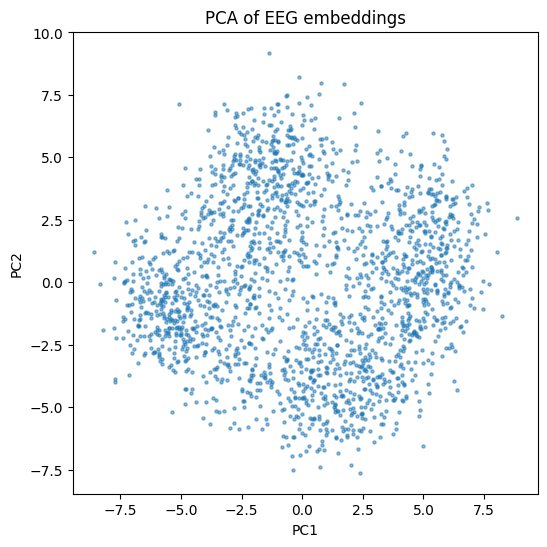

Explained variance: [0.12530968 0.09335294]


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
Z_pca = pca.fit_transform(Z_vis)

plt.figure(figsize=(6, 6))
plt.scatter(Z_pca[:, 0], Z_pca[:, 1], s=5, alpha=0.5)
plt.title("PCA of EEG embeddings")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print("Explained variance:", pca.explained_variance_ratio_)

In [ ]:
class ChannelSelfAttention(nn.Module):
    """
    Self-attention over channels (tokens), NOT time.
    Input/Output: (B, C, D)
    """
    def __init__(self, D=64, n_heads=4, dropout=0.1):
        super().__init__()
        assert D % n_heads == 0, "D must be divisible by n_heads"
        self.attn = nn.MultiheadAttention(embed_dim=D, num_heads=n_heads,
                                          dropout=dropout, batch_first=True)
        self.ln1 = nn.LayerNorm(D)
        self.ff = nn.Sequential(
            nn.Linear(D, 4 * D),
            nn.GELU(),
            nn.Linear(4 * D, D),
            nn.Dropout(dropout),
        )
        self.ln2 = nn.LayerNorm(D)

    def forward(self, x):
        # x: (B, C, D)
        attn_out, _ = self.attn(x, x, x, need_weights=False)
        x = self.ln1(x + attn_out)         # residual + norm
        ff_out = self.ff(x)
        x = self.ln2(x + ff_out)           # residual + norm
        return x


class Stage2Encoder(nn.Module):
    """
    Stage-2: per-channel temporal embedding + channel-wise attention + flatten + projector.
    """
    def __init__(self, T=250, C=63, D=64, out_dim=128, n_heads=4, dropout=0.1):
        super().__init__()
        self.embed = ChannelTimeMLP(T, D)                  # (B, C, T) -> (B, C, D)
        self.chan_attn = ChannelSelfAttention(D, n_heads, dropout)  # (B, C, D) -> (B, C, D)
        self.proj = nn.Sequential(
            nn.Linear(C * D, out_dim),
            nn.LayerNorm(out_dim),
        )

    def forward(self, x):
        z = self.embed(x)                     # (B, C, D)
        z = self.chan_attn(z)                 # (B, C, D)  <-- NEW
        z = z.reshape(z.size(0), -1)          # (B, C*D)
        z = self.proj(z)                      # (B, out_dim)
        return z

In [ ]:
model = Stage2Encoder(
    T=250,
    C=63,
    D=64,
    out_dim=128,
    n_heads=4,
    dropout=0.1
).to(device)

optimizer = optim.AdamW(model.parameters(), lr=1e-3)

In [ ]:
batch_size = 128
epochs = 8

model.train()
for epoch in range(epochs):
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0.0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i + batch_size]
        xb = X_t[idx]
        yb = y_t[idx]

        z = model(xb)
        loss = supervised_contrastive_loss(z, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}: loss = {total_loss:.2f}")

Epoch 1: loss = 89.48
Epoch 2: loss = 85.64
Epoch 3: loss = 78.18
Epoch 4: loss = 75.28
Epoch 5: loss = 70.41
Epoch 6: loss = 71.19
Epoch 7: loss = 73.90
Epoch 8: loss = 66.94


In [ ]:

model.train()
for epoch in range(epochs):
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0.0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i + batch_size]
        xb = X_t[idx]
        yb = y_t[idx]

        z = model(xb)
        loss = supervised_contrastive_loss(z, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}: loss = {total_loss:.2f}")

Epoch 1: loss = 68.27
Epoch 2: loss = 63.00
Epoch 3: loss = 62.58
Epoch 4: loss = 67.81
Epoch 5: loss = 68.86
Epoch 6: loss = 64.67
Epoch 7: loss = 67.27
Epoch 8: loss = 63.94


In [ ]:

model.train()
for epoch in range(epochs):
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0.0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i + batch_size]
        xb = X_t[idx]
        yb = y_t[idx]

        z = model(xb)
        loss = supervised_contrastive_loss(z, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}: loss = {total_loss:.2f}")

Epoch 1: loss = 63.72
Epoch 2: loss = 63.29
Epoch 3: loss = 64.18
Epoch 4: loss = 62.40
Epoch 5: loss = 64.91
Epoch 6: loss = 61.90
Epoch 7: loss = 61.99
Epoch 8: loss = 64.33


In [ ]:
model.eval()
with torch.no_grad():
    Z2 = model(X_t).cpu().numpy()


In [ ]:
print("Stage-2 same/diff:", same_label_diff_label_test(Z2, labels))


Stage-2 same/diff: (np.float32(0.38391578), np.float32(0.06698975))


In [ ]:
print("Stage-2 anchor same/diff:", anchor_same_diff_test(Z2, labels, n=1000))

Stage-2 anchor same/diff: (np.float32(0.37897944), np.float32(0.06444151))


In [ ]:
labels_shuf = labels.copy()
np.random.shuffle(labels_shuf)
print("Stage-2 shuffled:", anchor_same_diff_test(Z2, labels_shuf))

Stage-2 shuffled: (np.float32(0.07077518), np.float32(0.066482544))


In [ ]:
print("Mean embedding norm:", np.mean(np.linalg.norm(Z2, axis=1)))
print("Mean per-dim std:", np.std(Z2, axis=0).mean())

Mean embedding norm: 11.096465
Mean per-dim std: 0.93503475


In [ ]:
# per-dimension variance
per_dim_std = np.std(Z, axis=0)

print("Min std:", per_dim_std.min())
print("Mean std:", per_dim_std.mean())
print("Max std:", per_dim_std.max())

NameError: name 'Z' is not defined

In [ ]:
Z_rand = np.random.randn(*Z2.shape).astype(np.float32)

print("Random:", anchor_same_diff_test(Z_rand, labels))
print("Model :", anchor_same_diff_test(Z2, labels))

NameError: name 'Z' is not defined

In [ ]:
def collect_same_diff(Z, labels, n=5000):
    same, diff = [], []
    N = len(labels)
    for _ in range(n):
        i = np.random.randint(N)
        same_j = np.random.choice(np.where(labels == labels[i])[0])
        diff_j = np.random.choice(np.where(labels != labels[i])[0])
        same.append(cosine(Z[i], Z[same_j]))
        diff.append(cosine(Z[i], Z[diff_j]))
    return np.array(same), np.array(diff)

same, diff = collect_same_diff(Z2, labels)

In [ ]:
print("Same mean/std:", same.mean(), same.std())
print("Diff mean/std:", diff.mean(), diff.std())

Same mean/std: 0.44244742 0.22785245
Diff mean/std: 0.060273305 0.23004018


In [ ]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=6, metric="cosine")
nn.fit(Z2)
neighbors = nn.kneighbors(Z2, return_distance=False)

# skip self (neighbor 0)
acc = []
for i in range(len(Z2)):
    nn_labels = labels[neighbors[i][1:]]
    acc.append(np.mean(nn_labels == labels[i]))

print("NN label consistency:", np.mean(acc))

NN label consistency: 0.018089480048367593


In [ ]:
from itertools import combinations

within, across = [], []

for lab in np.unique(labels):
    idxs = np.where(labels == lab)[0]
    if len(idxs) < 2:
        continue
    for i, j in combinations(idxs, 2):
        within.append(cosine(Z2[i], Z2[j]))

    others = np.where(labels != lab)[0]
    for i in idxs:
        j = np.random.choice(others)
        across.append(cosine(Z2[i], Z2[j]))

print("Within-image:", np.mean(within))
print("Across-image:", np.mean(across))

Within-image: 0.38228443
Across-image: 0.06204183


In [ ]:
def cosine_sim(a, b, eps=1e-8):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b) + eps)


In [ ]:
def anchor_same_diff_test_clean(Z, labels, n=5000):
    same, diff = [], []
    N = len(labels)

    # build index by label ONCE
    label_to_indices = {}
    for i, lab in enumerate(labels):
        label_to_indices.setdefault(lab, []).append(i)

    valid_labels = [lab for lab, idxs in label_to_indices.items() if len(idxs) > 1]

    for _ in range(n):
        # choose anchor label uniformly (avoids frequency bias)
        lab = random.choice(valid_labels)
        idxs = label_to_indices[lab]

        # anchor
        i = random.choice(idxs)

        # same-label (different trial)
        j = random.choice([x for x in idxs if x != i])

        # different-label (uniform over labels, not samples)
        other_lab = random.choice([l for l in valid_labels if l != lab])
        k = random.choice(label_to_indices[other_lab])

        same.append(cosine_sim(Z[i], Z[j]))
        diff.append(cosine_sim(Z[i], Z[k]))

    return np.array(same), np.array(diff)


In [ ]:
from itertools import combinations

def within_across_image_test_clean(Z, labels):
    within, across = [], []

    label_to_indices = {}
    for i, lab in enumerate(labels):
        label_to_indices.setdefault(lab, []).append(i)

    labels_list = list(label_to_indices.keys())

    for lab in labels_list:
        idxs = label_to_indices[lab]
        if len(idxs) < 2:
            continue

        # all within-label pairs
        for i, j in combinations(idxs, 2):
            within.append(cosine_sim(Z[i], Z[j]))

        # across-label pairs (balanced)
        other_labs = [l for l in labels_list if l != lab]
        for i in idxs:
            other_lab = random.choice(other_labs)
            j = random.choice(label_to_indices[other_lab])
            across.append(cosine_sim(Z[i], Z[j]))

    return np.array(within), np.array(across)

In [ ]:
same, diff = anchor_same_diff_test_clean(Z2, labels)

print("Anchor SAME mean/std:", same.mean(), same.std())
print("Anchor DIFF mean/std:", diff.mean(), diff.std())


Anchor SAME mean/std: 0.3824562 0.14429952
Anchor DIFF mean/std: 0.06594391 0.22995716


In [ ]:
within, across = within_across_image_test_clean(Z2, labels)

print("Within-image mean/std:", within.mean(), within.std())
print("Across-image mean/std:", across.mean(), across.std())


Within-image mean/std: 0.38228443 0.143618
Across-image mean/std: 0.066695005 0.22896878


In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
import torch.nn as nn

In [ ]:
class TemporalSpatialConv(nn.Module):
    def __init__(self, C=63, D=64, kernel_size=3):
        super().__init__()

        self.temporal = nn.Conv1d(
            in_channels=C,
            out_channels=C,
            kernel_size=kernel_size,
            padding=kernel_size // 2,
            groups=C
        )

        self.spatial = nn.Conv1d(
            in_channels=C,
            out_channels=C,
            kernel_size=1
        )

        self.norm = nn.LayerNorm(D)  # normalize feature dim

    def forward(self, x):
        # x: (B, C, D)
        z = self.temporal(x)   # (B, C, D)
        z = self.spatial(z)    # (B, C, D)
        z = self.norm(z)       # LayerNorm applies to last dim (D)
        return z

In [ ]:
class Stage3Encoder(nn.Module):
    def __init__(self, T=250, C=63, D=64, out_dim=128, n_heads=4, dropout=0.1):
        super().__init__()
        self.embed = ChannelTimeMLP(T, D)
        self.attn = ChannelSelfAttention(D, n_heads, dropout)
        self.tsconv = TemporalSpatialConv(C, D)
        self.proj = nn.Sequential(
            nn.Linear(C * D, out_dim),
            nn.LayerNorm(out_dim),
        )

    def forward(self, x):
        z = self.embed(x)        # (B, C, D)
        z = self.attn(z)         # (B, C, D)
        z = self.tsconv(z)       # (B, C, D)
        z = z.reshape(z.size(0), -1)
        z = self.proj(z)
        return z

In [ ]:
model = Stage3Encoder(
    T=250, C=63, D=64,
    out_dim=128, n_heads=4
).to(device)

optimizer = optim.AdamW(model.parameters(), lr=3e-4)

In [ ]:
batch_size = 128
epochs = 8

In [ ]:

model.train()
for epoch in range(epochs):
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0.0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i + batch_size]
        xb = X_t[idx]
        yb = y_t[idx]

        z = model(xb)
        loss = supervised_contrastive_loss(z, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}: loss = {total_loss:.2f}")

Epoch 1: loss = 74.11
Epoch 2: loss = 74.90
Epoch 3: loss = 75.04
Epoch 4: loss = 71.64
Epoch 5: loss = 71.74
Epoch 6: loss = 67.11
Epoch 7: loss = 66.01
Epoch 8: loss = 66.63


In [ ]:

model.train()
for epoch in range(epochs):
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0.0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i + batch_size]
        xb = X_t[idx]
        yb = y_t[idx]

        z = model(xb)
        loss = supervised_contrastive_loss(z, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}: loss = {total_loss:.2f}")

Epoch 1: loss = 67.51
Epoch 2: loss = 66.35
Epoch 3: loss = 63.74
Epoch 4: loss = 64.41
Epoch 5: loss = 60.76
Epoch 6: loss = 64.12
Epoch 7: loss = 58.65
Epoch 8: loss = 64.07


In [ ]:
model.train()
for epoch in range(epochs):
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0.0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i + batch_size]
        xb = X_t[idx]
        yb = y_t[idx]

        z = model(xb)
        loss = supervised_contrastive_loss(z, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}: loss = {total_loss:.2f}")

Epoch 1: loss = 64.33
Epoch 2: loss = 63.42
Epoch 3: loss = 58.32
Epoch 4: loss = 60.36
Epoch 5: loss = 63.98
Epoch 6: loss = 61.08
Epoch 7: loss = 61.12
Epoch 8: loss = 61.95


In [ ]:

model.train()
for epoch in range(epochs):
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0.0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i + batch_size]
        xb = X_t[idx]
        yb = y_t[idx]

        z = model(xb)
        loss = supervised_contrastive_loss(z, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}: loss = {total_loss:.2f}")

Epoch 1: loss = 58.87
Epoch 2: loss = 59.17
Epoch 3: loss = 61.61
Epoch 4: loss = 57.99
Epoch 5: loss = 60.96
Epoch 6: loss = 58.46
Epoch 7: loss = 63.82
Epoch 8: loss = 63.75


In [ ]:
model.eval()
with torch.no_grad():
    Z2 = model(X_t).cpu().numpy()


In [ ]:
print("Stage-2 same/diff:", same_label_diff_label_test(Z2, labels))


Stage-2 same/diff: (np.float32(0.36510757), np.float32(0.04660057))


In [ ]:
print("Stage-2 anchor same/diff:", anchor_same_diff_test(Z2, labels, n=1000))

Stage-2 anchor same/diff: (np.float32(0.38089502), np.float32(0.031895872))


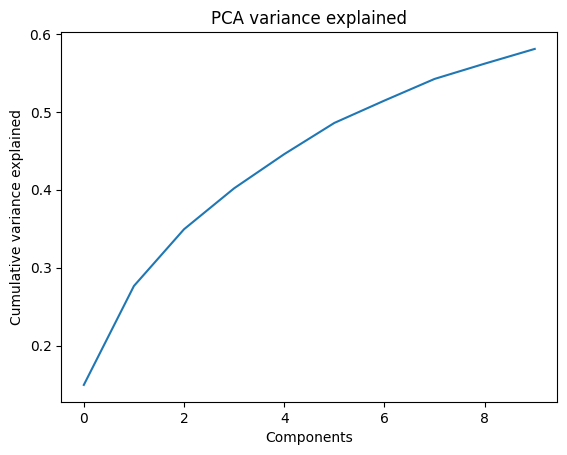

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=10)
Z_pca = pca.fit_transform(Z2)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Components")
plt.ylabel("Cumulative variance explained")
plt.title("PCA variance explained")
plt.show()

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


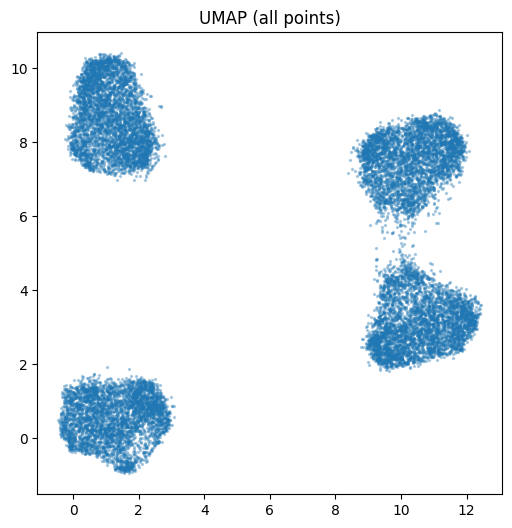

In [ ]:
import umap

reducer = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    metric="cosine",
    random_state=0
)

Z_umap = reducer.fit_transform(Z2)

plt.figure(figsize=(6, 6))
plt.scatter(Z_umap[:, 0], Z_umap[:, 1], s=2, alpha=0.3)
plt.title("UMAP (all points)")
plt.show()

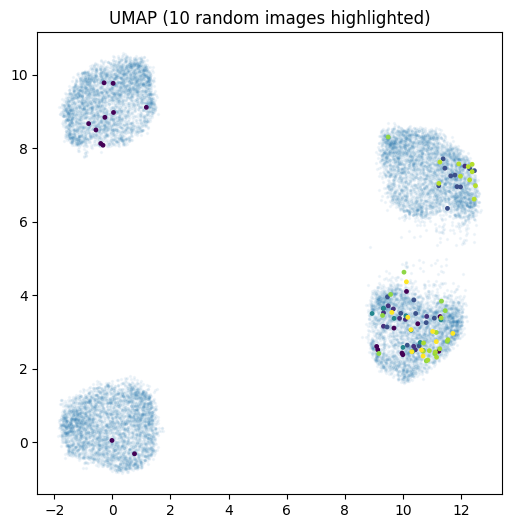

In [ ]:
subset_labels = np.random.choice(np.unique(labels), size=10, replace=False)
mask = np.isin(labels, subset_labels)

plt.figure(figsize=(6, 6))
plt.scatter(Z_umap[~mask, 0], Z_umap[~mask, 1], s=2, alpha=0.05)
plt.scatter(Z_umap[mask, 0], Z_umap[mask, 1], c=labels[mask], s=6)
plt.title("UMAP (10 random images highlighted)")
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def nearest_neighbor_accuracy(Z, labels):
    """
    For each embedding, check whether its nearest neighbor
    (excluding itself) has the same label.
    """
    # Normalize embeddings (important for cosine)
    Z_norm = Z / np.linalg.norm(Z, axis=1, keepdims=True)

    # Cosine similarity matrix (N x N)
    sim = cosine_similarity(Z_norm)

    # Ignore self-similarity
    np.fill_diagonal(sim, -np.inf)

    # Nearest neighbor index for each sample
    nn_idx = sim.argmax(axis=1)

    # Check label match
    correct = (labels[nn_idx] == labels)

    return correct.mean()

In [ ]:
acc = nearest_neighbor_accuracy(Z2, labels)
print("Nearest-neighbor retrieval accuracy:", acc)


Nearest-neighbor retrieval accuracy: 0.04516324062877872


In [ ]:
chance = 1.0 / len(np.unique(labels))
print("Chance level:", chance)

Chance level: 0.0006045949214026602


In [ ]:
shuffled = labels.copy()
np.random.shuffle(shuffled)

acc_shuffled = nearest_neighbor_accuracy(Z2, shuffled)
print("Shuffled-label NN accuracy:", acc_shuffled)

Shuffled-label NN accuracy: 0.0005441354292623942


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def nearest_neighbor_accuracy(Z, labels):
    Z = Z / np.linalg.norm(Z, axis=1, keepdims=True)
    sim = cosine_similarity(Z)
    np.fill_diagonal(sim, -np.inf)
    nn_idx = sim.argmax(axis=1)
    return np.mean(labels[nn_idx] == labels)

In [ ]:
nn_accs = []

for epoch in range(epochs):
    model.train()
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0.0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i + batch_size]
        xb = X_t[idx]
        yb = y_t[idx]

        z = model(xb)
        loss = supervised_contrastive_loss(z, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # ---- evaluation ----
    model.eval()
    with torch.no_grad():
        Z = model(X_t).cpu().numpy()
        acc = nearest_neighbor_accuracy(Z, labels)

    nn_accs.append(acc)
    print(f"Epoch {epoch+1}: loss={total_loss:.2f}, NN acc={acc:.4f}")

Epoch 1: loss=59.58, NN acc=0.0536
Epoch 2: loss=56.32, NN acc=0.0521
Epoch 3: loss=61.52, NN acc=0.0522
Epoch 4: loss=58.66, NN acc=0.0516
Epoch 5: loss=60.12, NN acc=0.0514
Epoch 6: loss=60.15, NN acc=0.0570
Epoch 7: loss=60.82, NN acc=0.0567
Epoch 8: loss=60.25, NN acc=0.0556


In [ ]:
from collections import defaultdict

def compute_image_centroids(Z, labels):
    buckets = defaultdict(list)
    for z, lab in zip(Z, labels):
        buckets[lab].append(z)

    centroids = {}
    for lab, vecs in buckets.items():
        centroids[lab] = np.mean(vecs, axis=0)

    return centroids

In [ ]:
def centroid_retrieval_accuracy(Z, labels, centroids):
    Z = Z / np.linalg.norm(Z, axis=1, keepdims=True)

    centroid_labels = np.array(list(centroids.keys()))
    centroid_vectors = np.stack([centroids[l] for l in centroid_labels])
    centroid_vectors = centroid_vectors / np.linalg.norm(
        centroid_vectors, axis=1, keepdims=True
    )

    sim = cosine_similarity(Z, centroid_vectors)
    preds = centroid_labels[sim.argmax(axis=1)]

    return np.mean(preds == labels)

In [ ]:
centroids = compute_image_centroids(Z, labels)
centroid_acc = centroid_retrieval_accuracy(Z, labels, centroids)

print("Centroid retrieval accuracy:", centroid_acc)
print("Chance level:", 1.0 / len(np.unique(labels)))

In [ ]:
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def loo_centroid_retrieval_accuracy(Z, labels):
    Z = Z / np.linalg.norm(Z, axis=1, keepdims=True)

    # group indices by label
    label_to_idx = defaultdict(list)
    for i, lab in enumerate(labels):
        label_to_idx[lab].append(i)

    correct = 0
    total = 0

    for i in range(len(Z)):
        lab = labels[i]

        # build centroids excluding current sample
        centroid_labels = []
        centroid_vecs = []

        for l, idxs in label_to_idx.items():
            if l == lab:
                if len(idxs) <= 1:
                    continue
                vecs = [Z[j] for j in idxs if j != i]
            else:
                vecs = [Z[j] for j in idxs]

            centroid_labels.append(l)
            centroid_vecs.append(np.mean(vecs, axis=0))

        centroid_vecs = np.stack(centroid_vecs)
        centroid_vecs /= np.linalg.norm(centroid_vecs, axis=1, keepdims=True)

        sim = cosine_similarity(Z[i:i+1], centroid_vecs)[0]
        pred = centroid_labels[np.argmax(sim)]

        correct += (pred == lab)
        total += 1

    return correct / total

In [ ]:
loo_acc = loo_centroid_retrieval_accuracy(Z, labels)
print("LOO centroid retrieval accuracy:", loo_acc)
print("Chance:", 1.0 / len(np.unique(labels)))

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#YELLOW

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
#____________________________________________________________________________________________________________________________________________________________________________________________________

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q huggingface_hub

In [ ]:
from huggingface_hub import login
login()

In [ ]:
from huggingface_hub import whoami
whoami()

{'type': 'user',
 'id': '687b622a1ed78b548972a491',
 'name': 'aaryonthepop',
 'fullname': 'Aaryaansh Gaind',
 'isPro': False,
 'avatarUrl': '/avatars/48934f48310427a290024121e4df5ef9.svg',
 'orgs': [],
 'auth': {'type': 'access_token',
  'accessToken': {'displayName': 'aaryayay',
   'role': 'fineGrained',
   'createdAt': '2025-12-26T07:03:55.205Z',
   'fineGrained': {'canReadGatedRepos': True,
    'global': [],
    'scoped': [{'entity': {'_id': '687b622a1ed78b548972a491',
       'type': 'user',
       'name': 'aaryonthepop'},
      'permissions': []}]}}}}

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -o /content/drive/MyDrive/Image_set_Resize.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/Image_set_Resize/train_images/01175_roller_coaster/roller_coaster_03s.jpg  
  inflating: /content/Image_set_Resize/train_images/01175_roller_coaster/roller_coaster_02s.jpg  
  inflating: /content/Image_set_Resize/train_images/01175_roller_coaster/roller_coaster_09s.jpg  
  inflating: /content/Image_set_Resize/train_images/01175_roller_coaster/roller_coaster_05s.jpg  
  inflating: /content/Image_set_Resize/train_images/01175_roller_coaster/roller_coaster_04s.jpg  
  inflating: /content/Image_set_Resize/train_images/01175_roller_coaster/roller_coaster_08s.jpg  
   creating: /content/Image_set_Resize/train_images/00865_marmalade/
  inflating: /content/Image_set_Resize/train_images/00865_marmalade/marmalade_08s.jpg  
  inflating: /content/Image_set_Resize/train_images/00865_marmalade/marmalade_04s.jpg  
  inflating: /content/Image_set_Resize/train_images/00865_marmalade/marmalade_05s.jpg  
  inflating: /content/Image_

In [ ]:
import os

root = "/content/Image_set_Resize/train_images"
print("Train concepts:", len(os.listdir(root)))
print("Example concept:", os.listdir(root)[0])

Train concepts: 1654
Example concept: 00010_airplane


In [ ]:
!pip install -q ftfy regex tqdm
!pip install -q git+https://github.com/openai/CLIP.git

  Preparing metadata (setup.py) ... done


In [ ]:
import clip
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

clip_model, clip_preprocess = clip.load("ViT-B/32", device=device)
clip_model.eval()  # IMPORTANT: frozen

CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): Sequential(
        (0): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): QuickGELU()
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
        (1): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          

In [ ]:
clip_cache = {}

In [ ]:
from PIL import Image

@torch.no_grad()
def get_clip_embedding(image_path):
    """
    Returns a CLIP embedding for an image.
    Uses a cache to avoid recomputation.
    """
    if image_path in clip_cache:
        return clip_cache[image_path]

    # Load + preprocess image
    image = Image.open(image_path).convert("RGB")
    image = clip_preprocess(image).unsqueeze(0).to(device)

    # Run CLIP
    embedding = clip_model.encode_image(image)
    embedding = embedding / embedding.norm(dim=-1, keepdim=True)  # normalize

    # Store in cache (move to CPU to save GPU memory)
    clip_cache[image_path] = embedding.squeeze(0).cpu()

    return clip_cache[image_path]

In [ ]:
import os

root = "/content/Image_set_Resize/train_images"
concept = os.listdir(root)[0]
image_file = os.listdir(os.path.join(root, concept))[0]

image_path = os.path.join(root, concept, image_file)

In [ ]:
z1 = get_clip_embedding(image_path)
z2 = get_clip_embedding(image_path)

print(z1.shape)
print("Same object:", z1.data_ptr() == z2.data_ptr())

torch.Size([512])
Same object: True


In [ ]:
clip_proj = nn.Linear(512, 128).to(device)

In [ ]:
def eeg_clip_loss(z_eeg, z_img):
    """
    z_eeg: (B, 128)
    z_img: (B, 128)
    """
    z_eeg = F.normalize(z_eeg, dim=1)
    z_img = F.normalize(z_img, dim=1)

    return 1 - (z_eeg * z_img).sum(dim=1).mean()

In [ ]:
import clip
import torch
import torch.nn.functional as F
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"

clip_model, clip_preprocess = clip.load("ViT-B/32", device=device)
clip_model.eval()  # CLIP is frozen

CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): Sequential(
        (0): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): QuickGELU()
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
        (1): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          

In [ ]:
clip_cache = {}

In [ ]:
@torch.no_grad()
def get_clip_embedding(image_path):
    if image_path in clip_cache:
        return clip_cache[image_path]

    image = Image.open(image_path).convert("RGB")
    image = clip_preprocess(image).unsqueeze(0).to(device)

    z = clip_model.encode_image(image)
    z = z / z.norm(dim=-1, keepdim=True)

    clip_cache[image_path] = z.squeeze(0).cpu()
    return clip_cache[image_path]

In [ ]:
clip_proj = torch.nn.Linear(512, 128).to(device)

In [ ]:
def eeg_clip_loss(z_eeg, z_img):
    z_eeg = F.normalize(z_eeg, dim=1)
    z_img = F.normalize(z_img, dim=1)
    return 1 - (z_eeg * z_img).sum(dim=1).mean()


In [ ]:
import os
from glob import glob

IMAGE_ROOT = "/content/Image_set_Resize/train_images"

# Map: concept_id -> list of image paths
concept_to_images = {}

concept_folders = sorted(os.listdir(IMAGE_ROOT))

for folder in concept_folders:
    concept_id = int(folder.split("_")[0]) - 1  # zero-based
    folder_path = os.path.join(IMAGE_ROOT, folder)
    images = sorted(glob(os.path.join(folder_path, "*.jpg")))
    concept_to_images[concept_id] = images

In [ ]:
import random

image_list = []

for i in range(len(X_t)):
    concept_id = int(y_t[i])
    img_path = random.choice(concept_to_images[concept_id])
    image_list.append(img_path)

In [ ]:
len(image_list) == len(X_t)

True

In [ ]:
optimizer = optim.AdamW(
    list(model.parameters()) + list(clip_proj.parameters()),
    lr=3e-4
)

In [ ]:
model = Stage3Encoder(
    T=250, C=63, D=64,
    out_dim=128, n_heads=4
).to(device)

In [ ]:
model.train()
clip_proj.train()

for epoch in range(epochs):
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0.0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i + batch_size]

        # -------------------------
        # EEG batch
        # -------------------------
        xb = X_t[idx].to(device)          # (B, C, T)

        # -------------------------
        # EEG → embedding
        # -------------------------
        z_eeg = model(xb)                 # (B, 128)

        # -------------------------
        # Image paths for this batch
        # -------------------------
        batch_image_paths = [image_list[j] for j in idx.tolist()]

        # -------------------------
        # CLIP embeddings (cached)
        # -------------------------
        z_img_list = []
        for p in batch_image_paths:
            z_img_list.append(get_clip_embedding(p))   # (512,)

        z_img = torch.stack(z_img_list).to(device).float()     # (B, 512)
        z_img = clip_proj(z_img)                        # (B, 128)

        # -------------------------
        # EEG–CLIP loss
        # -------------------------
        loss = eeg_clip_loss(z_eeg, z_img)

        # -------------------------
        # Backprop
        # -------------------------
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_t.shape[0]:.4f}")

Epoch 1: loss = 0.5058
Epoch 2: loss = 0.3974
Epoch 3: loss = 0.3901
Epoch 4: loss = 0.3869
Epoch 5: loss = 0.3849
Epoch 6: loss = 0.3836
Epoch 7: loss = 0.3825
Epoch 8: loss = 0.3816


In [ ]:
def eeg_clip_infonce(z_eeg, z_img, temperature=0.07):
    z_eeg = F.normalize(z_eeg, dim=1)
    z_img = F.normalize(z_img, dim=1)

    logits = z_eeg @ z_img.T / temperature   # (B, B)
    labels = torch.arange(z_eeg.size(0), device=z_eeg.device)

    return F.cross_entropy(logits, labels)

In [ ]:
def eeg_clip_infonce(z_eeg, z_img, temperature=0.07):
    """
    z_eeg: (B, 128) EEG embeddings
    z_img: (B, 128) CLIP image embeddings
    """
    # Normalize (cosine similarity)
    z_eeg = F.normalize(z_eeg, dim=1)
    z_img = F.normalize(z_img, dim=1)

    # Similarity matrix: (B, B)
    logits = z_eeg @ z_img.T            # dot products
    logits = logits / temperature       # sharpen distribution

    # Correct pair is on the diagonal
    labels = torch.arange(z_eeg.size(0), device=z_eeg.device)

    # Cross-entropy over rows
    loss = F.cross_entropy(logits, labels)
    return loss


In [ ]:
optimizer = optim.AdamW(
    list(model.parameters()) + list(clip_proj.parameters()),
    lr=3e-4,
    weight_decay=1e-4
)

In [ ]:
model.train()
clip_proj.train()

for epoch in range(epochs):
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0.0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i + batch_size]

        # EEG batch
        xb = X_t[idx].to(device)                 # (B, C, T)

        # EEG → embedding
        z_eeg = model(xb)                        # (B, 128)

        # Image paths
        batch_image_paths = [image_list[j] for j in idx.tolist()]

        # CLIP embeddings (cached)
        z_img_list = []
        for p in batch_image_paths:
            z_img_list.append(get_clip_embedding(p))   # (512,)

        # z_img = torch.stack(z_img_list).to(device)     # (B, 512)
        # z_img = clip_proj(z_img)                        # (B, 128)
        z_img = torch.stack(z_img_list).to(device).float()
        z_img = clip_proj(z_img)

        # InfoNCE loss
        loss = eeg_clip_infonce(z_eeg, z_img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_t.shape[0]:.4f}")


Epoch 1: loss = 4.2930
Epoch 2: loss = 3.2910
Epoch 3: loss = 2.4452
Epoch 4: loss = 1.9275
Epoch 5: loss = 1.5795
Epoch 6: loss = 1.3224
Epoch 7: loss = 1.1259
Epoch 8: loss = 0.9669


In [ ]:
model.train()
clip_proj.train()

for epoch in range(epochs):
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0.0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i + batch_size]

        # EEG batch
        xb = X_t[idx].to(device)                 # (B, C, T)

        # EEG → embedding
        z_eeg = model(xb)                        # (B, 128)

        # Image paths
        batch_image_paths = [image_list[j] for j in idx.tolist()]

        # CLIP embeddings (cached)
        z_img_list = []
        for p in batch_image_paths:
            z_img_list.append(get_clip_embedding(p))   # (512,)

        # z_img = torch.stack(z_img_list).to(device)     # (B, 512)
        # z_img = clip_proj(z_img)                        # (B, 128)
        z_img = torch.stack(z_img_list).to(device).float()
        z_img = clip_proj(z_img)

        # InfoNCE loss
        loss = eeg_clip_infonce(z_eeg, z_img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_t.shape[0]:.4f}")


Epoch 1: loss = 0.8379
Epoch 2: loss = 0.7420
Epoch 3: loss = 0.6542
Epoch 4: loss = 0.5823
Epoch 5: loss = 0.5273
Epoch 6: loss = 0.4813
Epoch 7: loss = 0.4398
Epoch 8: loss = 0.4072


In [ ]:
model.train()
clip_proj.train()

for epoch in range(epochs):
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0.0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i + batch_size]

        # EEG batch
        xb = X_t[idx].to(device)                 # (B, C, T)

        # EEG → embedding
        z_eeg = model(xb)                        # (B, 128)

        # Image paths
        batch_image_paths = [image_list[j] for j in idx.tolist()]

        # CLIP embeddings (cached)
        z_img_list = []
        for p in batch_image_paths:
            z_img_list.append(get_clip_embedding(p))   # (512,)

        # z_img = torch.stack(z_img_list).to(device)     # (B, 512)
        # z_img = clip_proj(z_img)                        # (B, 128)
        z_img = torch.stack(z_img_list).to(device).float()
        z_img = clip_proj(z_img)

        # InfoNCE loss
        loss = eeg_clip_infonce(z_eeg, z_img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_t.shape[0]:.4f}")


Epoch 1: loss = 0.3782
Epoch 2: loss = 0.3525
Epoch 3: loss = 0.3284
Epoch 4: loss = 0.3085
Epoch 5: loss = 0.2927
Epoch 6: loss = 0.2776
Epoch 7: loss = 0.2645
Epoch 8: loss = 0.2508


In [ ]:
model.train()
clip_proj.train()

for epoch in range(epochs):
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0.0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i + batch_size]

        # EEG batch
        xb = X_t[idx].to(device)                 # (B, C, T)

        # EEG → embedding
        z_eeg = model(xb)                        # (B, 128)

        # Image paths
        batch_image_paths = [image_list[j] for j in idx.tolist()]

        # CLIP embeddings (cached)
        z_img_list = []
        for p in batch_image_paths:
            z_img_list.append(get_clip_embedding(p))   # (512,)

        # z_img = torch.stack(z_img_list).to(device)     # (B, 512)
        # z_img = clip_proj(z_img)                        # (B, 128)
        z_img = torch.stack(z_img_list).to(device).float()
        z_img = clip_proj(z_img)

        # InfoNCE loss
        loss = eeg_clip_infonce(z_eeg, z_img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_t.shape[0]:.4f}")


Epoch 1: loss = 0.2392
Epoch 2: loss = 0.2291
Epoch 3: loss = 0.2196
Epoch 4: loss = 0.2086
Epoch 5: loss = 0.2033
Epoch 6: loss = 0.1965
Epoch 7: loss = 0.1873
Epoch 8: loss = 0.1819


In [ ]:
model.train()
clip_proj.train()

for epoch in range(epochs):
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0.0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i + batch_size]

        # EEG batch
        xb = X_t[idx].to(device)                 # (B, C, T)

        # EEG → embedding
        z_eeg = model(xb)                        # (B, 128)

        # Image paths
        batch_image_paths = [image_list[j] for j in idx.tolist()]

        # CLIP embeddings (cached)
        z_img_list = []
        for p in batch_image_paths:
            z_img_list.append(get_clip_embedding(p))   # (512,)

        # z_img = torch.stack(z_img_list).to(device)     # (B, 512)
        # z_img = clip_proj(z_img)                        # (B, 128)
        z_img = torch.stack(z_img_list).to(device).float()
        z_img = clip_proj(z_img)

        # InfoNCE loss
        loss = eeg_clip_infonce(z_eeg, z_img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_t.shape[0]:.4f}")


Epoch 1: loss = 0.1781
Epoch 2: loss = 0.1719
Epoch 3: loss = 0.1665
Epoch 4: loss = 0.1627
Epoch 5: loss = 0.1585
Epoch 6: loss = 0.1526
Epoch 7: loss = 0.1477
Epoch 8: loss = 0.1446


In [ ]:
model.train()
clip_proj.train()

for epoch in range(epochs):
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0.0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i + batch_size]

        # EEG batch
        xb = X_t[idx].to(device)                 # (B, C, T)

        # EEG → embedding
        z_eeg = model(xb)                        # (B, 128)

        # Image paths
        batch_image_paths = [image_list[j] for j in idx.tolist()]

        # CLIP embeddings (cached)
        z_img_list = []
        for p in batch_image_paths:
            z_img_list.append(get_clip_embedding(p))   # (512,)

        # z_img = torch.stack(z_img_list).to(device)     # (B, 512)
        # z_img = clip_proj(z_img)                        # (B, 128)
        z_img = torch.stack(z_img_list).to(device).float()
        z_img = clip_proj(z_img)

        # InfoNCE loss
        loss = eeg_clip_infonce(z_eeg, z_img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_t.shape[0]:.4f}")


Epoch 1: loss = 0.1423
Epoch 2: loss = 0.1401
Epoch 3: loss = 0.1354
Epoch 4: loss = 0.1323
Epoch 5: loss = 0.1266
Epoch 6: loss = 0.1251
Epoch 7: loss = 0.1220
Epoch 8: loss = 0.1209


In [ ]:
model.train()
clip_proj.train()

for epoch in range(epochs):
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0.0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i + batch_size]

        # EEG batch
        xb = X_t[idx].to(device)                 # (B, C, T)

        # EEG → embedding
        z_eeg = model(xb)                        # (B, 128)

        # Image paths
        batch_image_paths = [image_list[j] for j in idx.tolist()]

        # CLIP embeddings (cached)
        z_img_list = []
        for p in batch_image_paths:
            z_img_list.append(get_clip_embedding(p))   # (512,)

        # z_img = torch.stack(z_img_list).to(device)     # (B, 512)
        z_img = torch.stack(z_img_list).to(device).float()
        z_img = clip_proj(z_img)                        # (B, 128)

        # InfoNCE loss
        loss = eeg_clip_infonce(z_eeg, z_img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_t.shape[0]:.4f}")


Epoch 1: loss = 0.2467
Epoch 2: loss = 0.2379
Epoch 3: loss = 0.2254
Epoch 4: loss = 0.2159
Epoch 5: loss = 0.2094
Epoch 6: loss = 0.2028
Epoch 7: loss = 0.1943
Epoch 8: loss = 0.1890


In [ ]:
model.train()
clip_proj.train()

for epoch in range(epochs):
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0.0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i + batch_size]

        # EEG batch
        xb = X_t[idx].to(device)                 # (B, C, T)

        # EEG → embedding
        z_eeg = model(xb)                        # (B, 128)

        # Image paths
        batch_image_paths = [image_list[j] for j in idx.tolist()]

        # CLIP embeddings (cached)
        z_img_list = []
        for p in batch_image_paths:
            z_img_list.append(get_clip_embedding(p))   # (512,)

        # z_img = torch.stack(z_img_list).to(device)     # (B, 512)
        z_img = torch.stack(z_img_list).to(device).float()
        z_img = clip_proj(z_img)                        # (B, 128)

        # InfoNCE loss
        loss = eeg_clip_infonce(z_eeg, z_img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_t.shape[0]:.4f}")


Epoch 1: loss = 0.9412
Epoch 2: loss = 0.8296
Epoch 3: loss = 0.7341
Epoch 4: loss = 0.6592
Epoch 5: loss = 0.5924
Epoch 6: loss = 0.5361
Epoch 7: loss = 0.4953
Epoch 8: loss = 0.4585


In [ ]:
model.train()
clip_proj.train()

for epoch in range(epochs):
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0.0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i + batch_size]

        # EEG batch
        xb = X_t[idx].to(device)                 # (B, C, T)

        # EEG → embedding
        z_eeg = model(xb)                        # (B, 128)

        # Image paths
        batch_image_paths = [image_list[j] for j in idx.tolist()]

        # CLIP embeddings (cached)
        z_img_list = []
        for p in batch_image_paths:
            z_img_list.append(get_clip_embedding(p))   # (512,)

        # z_img = torch.stack(z_img_list).to(device)     # (B, 512)
        z_img = torch.stack(z_img_list).to(device).float()
        z_img = clip_proj(z_img)                        # (B, 128)

        # InfoNCE loss
        loss = eeg_clip_infonce(z_eeg, z_img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_t.shape[0]:.4f}")


Epoch 1: loss = 0.4233
Epoch 2: loss = 0.3944
Epoch 3: loss = 0.3709
Epoch 4: loss = 0.3464
Epoch 5: loss = 0.3283
Epoch 6: loss = 0.3109
Epoch 7: loss = 0.2965
Epoch 8: loss = 0.2795


In [ ]:
model.train()
clip_proj.train()

for epoch in range(epochs):
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0.0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i + batch_size]

        # EEG batch
        xb = X_t[idx].to(device)                 # (B, C, T)

        # EEG → embedding
        z_eeg = model(xb)                        # (B, 128)

        # Image paths
        batch_image_paths = [image_list[j] for j in idx.tolist()]

        # CLIP embeddings (cached)
        z_img_list = []
        for p in batch_image_paths:
            z_img_list.append(get_clip_embedding(p))   # (512,)

        # z_img = torch.stack(z_img_list).to(device)     # (B, 512)
        z_img = torch.stack(z_img_list).to(device).float()
        z_img = clip_proj(z_img)                        # (B, 128)

        # InfoNCE loss
        loss = eeg_clip_infonce(z_eeg, z_img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_t.shape[0]:.4f}")


Epoch 1: loss = 0.2676
Epoch 2: loss = 0.2543
Epoch 3: loss = 0.2447
Epoch 4: loss = 0.2340
Epoch 5: loss = 0.2248
Epoch 6: loss = 0.2165
Epoch 7: loss = 0.2105
Epoch 8: loss = 0.2036


In [ ]:
model.train()
clip_proj.train()

for epoch in range(epochs):
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0.0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i + batch_size]

        # EEG batch
        xb = X_t[idx].to(device)                 # (B, C, T)

        # EEG → embedding
        z_eeg = model(xb)                        # (B, 128)

        # Image paths
        batch_image_paths = [image_list[j] for j in idx.tolist()]

        # CLIP embeddings (cached)
        z_img_list = []
        for p in batch_image_paths:
            z_img_list.append(get_clip_embedding(p))   # (512,)

        # z_img = torch.stack(z_img_list).to(device)     # (B, 512)
        z_img = torch.stack(z_img_list).to(device).float()
        z_img = clip_proj(z_img)                        # (B, 128)

        # InfoNCE loss
        loss = eeg_clip_infonce(z_eeg, z_img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_t.shape[0]:.4f}")



Epoch 1: loss = 0.1961
Epoch 2: loss = 0.1914
Epoch 3: loss = 0.1848
Epoch 4: loss = 0.1801
Epoch 5: loss = 0.1744
Epoch 6: loss = 0.1699
Epoch 7: loss = 0.1641
Epoch 8: loss = 0.1594


In [ ]:
model.train()
clip_proj.train()

for epoch in range(epochs):
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0.0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i + batch_size]

        # EEG batch
        xb = X_t[idx].to(device)                 # (B, C, T)

        # EEG → embedding
        z_eeg = model(xb)                        # (B, 128)

        # Image paths
        batch_image_paths = [image_list[j] for j in idx.tolist()]

        # CLIP embeddings (cached)
        z_img_list = []
        for p in batch_image_paths:
            z_img_list.append(get_clip_embedding(p))   # (512,)

        # z_img = torch.stack(z_img_list).to(device)     # (B, 512)
        z_img = torch.stack(z_img_list).to(device).float()
        z_img = clip_proj(z_img)                        # (B, 128)

        # InfoNCE loss
        loss = eeg_clip_infonce(z_eeg, z_img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_t.shape[0]:.4f}")


Epoch 1: loss = 0.1544
Epoch 2: loss = 0.1513
Epoch 3: loss = 0.1483
Epoch 4: loss = 0.1439
Epoch 5: loss = 0.1406
Epoch 6: loss = 0.1392
Epoch 7: loss = 0.1350
Epoch 8: loss = 0.1330


In [ ]:
model.train()
clip_proj.train()

for epoch in range(epochs):
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0.0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i + batch_size]

        # EEG batch
        xb = X_t[idx].to(device)                 # (B, C, T)

        # EEG → embedding
        z_eeg = model(xb)                        # (B, 128)

        # Image paths
        batch_image_paths = [image_list[j] for j in idx.tolist()]

        # CLIP embeddings (cached)
        z_img_list = []
        for p in batch_image_paths:
            z_img_list.append(get_clip_embedding(p))   # (512,)

        z_img = torch.stack(z_img_list).to(device)     # (B, 512)
        z_img = clip_proj(z_img)                        # (B, 128)

        # InfoNCE loss
        loss = eeg_clip_infonce(z_eeg, z_img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_t.shape[0]:.4f}")


Epoch 1: loss = 0.1488
Epoch 2: loss = 0.1442
Epoch 3: loss = 0.1396
Epoch 4: loss = 0.1380
Epoch 5: loss = 0.1341
Epoch 6: loss = 0.1311
Epoch 7: loss = 0.1268
Epoch 8: loss = 0.1253


In [ ]:
model.eval()
clip_proj.eval()

Linear(in_features=512, out_features=128, bias=True)

In [ ]:
@torch.no_grad()
def build_image_bank(image_list):
    """
    Returns:
      Z_img: (N, 128) tensor of image embeddings
    """
    Z = []

    for p in image_list:
        z = get_clip_embedding(p)      # (512,) CPU
        Z.append(z)

    Z = torch.stack(Z).to(device).float()      # (N, 512)
    Z = clip_proj(Z)                   # (N, 128)
    Z = F.normalize(Z, dim=1)

    return Z


In [ ]:
Z_img_bank = build_image_bank(image_list)

In [ ]:
@torch.no_grad()
def compute_eeg_embeddings(X):
    Z = []
    for i in range(0, X.shape[0], batch_size):
        xb = X[i:i+batch_size].to(device)
        z = model(xb)
        Z.append(z)
    Z = torch.cat(Z, dim=0)
    Z = F.normalize(Z, dim=1)
    return Z


In [ ]:
Z_eeg = compute_eeg_embeddings(X_t)

In [ ]:
sim = Z_eeg @ Z_img_bank.T

In [ ]:
def retrieval_accuracy(sim, K=1):
    """
    sim: (N, N) similarity matrix
    """
    # Indices of top-K images per EEG
    topk = sim.topk(K, dim=1).indices  # (N, K)

    # Correct match is on the diagonal
    correct = torch.arange(sim.size(0), device=sim.device).unsqueeze(1)

    # Check if correct index appears in top-K
    hits = (topk == correct).any(dim=1).float()

    return hits.mean().item()

In [ ]:
top1 = retrieval_accuracy(sim, K=1)
top5 = retrieval_accuracy(sim, K=5)

print(f"Top-1 accuracy: {top1:.3f}")
print(f"Top-5 accuracy: {top5:.3f}")

Top-1 accuracy: 0.655
Top-5 accuracy: 0.999


In [ ]:
N = X_t.shape[0]
split = int(0.8 * N)

X_train, X_test = X_t[:split], X_t[split:]
y_train, y_test = y_t[:split], y_t[split:]
image_train = image_list[:split]
image_test  = image_list[split:]

In [ ]:
Z_img_bank = build_image_bank(image_train)

In [ ]:
Z_eeg_test = compute_eeg_embeddings(X_test)
sim = Z_eeg_test @ Z_img_bank.T

top1 = retrieval_accuracy(sim, K=1)
top5 = retrieval_accuracy(sim, K=5)

In [ ]:
top1

0.0

In [ ]:
top5

0.00030229747062548995

In [ ]:
import torch
import torch.nn.functional as F

@torch.no_grad()
def build_concept_clip_bank(concept_to_images):
    """
    Returns:
      concept_to_clip512: dict[label -> (Ni,512)] on CPU
    """
    concept_to_clip512 = {}

    for c, paths in concept_to_images.items():
        Z = []
        for p in paths:
            z = get_clip_embedding(p)     # (512,) CPU
            Z.append(z)
        Z = torch.stack(Z, dim=0)         # (Ni,512)
        Z = F.normalize(Z, dim=1)
        concept_to_clip512[c] = Z

    return concept_to_clip512

In [ ]:
concept_to_clip512 = build_concept_clip_bank(concept_to_images)
concept_to_clip512_gpu = {
    c: Z.to(device) for c, Z in concept_to_clip512.items()
}
all_concepts = sorted(concept_to_clip512_gpu.keys())

In [ ]:
N = X_t.size(0)
perm = torch.randperm(N)

split = int(0.8 * N)
train_idx = perm[:split]
test_idx  = perm[split:]

X_train = X_t[train_idx]
y_train = y_t[train_idx]

X_test = X_t[test_idx]
y_test = y_t[test_idx]


In [ ]:
import random

def build_candidate_set(batch_labels,
                        concept_to_clip512_gpu,
                        all_concepts,
                        extra_neg_concepts=64):
    """
    Returns:
      Zcand512: (M,512)
      cand_concept_ids: (M,)
    """
    batch_concepts = set(batch_labels.tolist())

    neg_pool = [c for c in all_concepts if c not in batch_concepts]
    sampled_neg = random.sample(
        neg_pool, k=min(extra_neg_concepts, len(neg_pool))
    )

    candidate_concepts = list(batch_concepts) + sampled_neg

    Z_list, cid_list = [], []
    for c in candidate_concepts:
        Zc = concept_to_clip512_gpu[c]      # (Ni,512)
        Z_list.append(Zc)
        cid_list.append(
            torch.full((Zc.size(0),), c,
                       device=device, dtype=torch.long)
        )

    Zcand512 = torch.cat(Z_list, dim=0)       # (M,512)
    cand_concept_ids = torch.cat(cid_list, dim=0)

    return Zcand512, cand_concept_ids

In [ ]:
def multi_positive_infonce(z_eeg,
                           Zcand,
                           cand_concept_ids,
                           batch_labels,
                           temperature=0.07):
    """
    z_eeg: (B,128)
    Zcand: (M,128)
    """
    z_eeg = F.normalize(z_eeg, dim=1)
    Zcand = F.normalize(Zcand, dim=1)

    logits = (z_eeg @ Zcand.T) / temperature   # (B,M)

    pos_mask = (batch_labels[:, None] ==
                cand_concept_ids[None, :])    # (B,M)

    neg_inf = torch.tensor(-1e9, device=logits.device)
    pos_logits = torch.where(pos_mask, logits, neg_inf)

    log_num = torch.logsumexp(pos_logits, dim=1)
    log_den = torch.logsumexp(logits, dim=1)

    return (log_den - log_num).mean()

In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_train.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_train.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_train[idx].to(device)      # (B,C,T)
        yb = y_train[idx].to(device)      # (B,)

        z_eeg = model(xb)                 # (B,128)

        Zcand512, cand_concept_ids = build_candidate_set(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        Zcand128 = clip_proj(Zcand512.float())   # dtype-safe

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_train.size(0):.4f}")

Epoch 1: loss = 4.9918
Epoch 2: loss = 4.3346
Epoch 3: loss = 4.0654
Epoch 4: loss = 3.8747
Epoch 5: loss = 3.7165
Epoch 6: loss = 3.5880
Epoch 7: loss = 3.4801
Epoch 8: loss = 3.3863


In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_train.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_train.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_train[idx].to(device)      # (B,C,T)
        yb = y_train[idx].to(device)      # (B,)

        z_eeg = model(xb)                 # (B,128)

        Zcand512, cand_concept_ids = build_candidate_set(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        Zcand128 = clip_proj(Zcand512.float())   # dtype-safe

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_train.size(0):.4f}")

Epoch 1: loss = 3.3007
Epoch 2: loss = 3.2288
Epoch 3: loss = 3.1634
Epoch 4: loss = 3.1001
Epoch 5: loss = 3.0436
Epoch 6: loss = 2.9919
Epoch 7: loss = 2.9464
Epoch 8: loss = 2.9010


In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_train.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_train.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_train[idx].to(device)      # (B,C,T)
        yb = y_train[idx].to(device)      # (B,)

        z_eeg = model(xb)                 # (B,128)

        Zcand512, cand_concept_ids = build_candidate_set(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        Zcand128 = clip_proj(Zcand512.float())   # dtype-safe

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_train.size(0):.4f}")

Epoch 1: loss = 2.8634
Epoch 2: loss = 2.8305
Epoch 3: loss = 2.7885
Epoch 4: loss = 2.7577
Epoch 5: loss = 2.7228
Epoch 6: loss = 2.6954
Epoch 7: loss = 2.6697
Epoch 8: loss = 2.6461


In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_train.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_train.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_train[idx].to(device)      # (B,C,T)
        yb = y_train[idx].to(device)      # (B,)

        z_eeg = model(xb)                 # (B,128)

        Zcand512, cand_concept_ids = build_candidate_set(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        Zcand128 = clip_proj(Zcand512.float())   # dtype-safe

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_train.size(0):.4f}")

Epoch 1: loss = 2.6174
Epoch 2: loss = 2.5958
Epoch 3: loss = 2.5772
Epoch 4: loss = 2.5519
Epoch 5: loss = 2.5346
Epoch 6: loss = 2.5129
Epoch 7: loss = 2.5004
Epoch 8: loss = 2.4768


In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_train.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_train.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_train[idx].to(device)      # (B,C,T)
        yb = y_train[idx].to(device)      # (B,)

        z_eeg = model(xb)                 # (B,128)

        Zcand512, cand_concept_ids = build_candidate_set(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        Zcand128 = clip_proj(Zcand512.float())   # dtype-safe

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_train.size(0):.4f}")

Epoch 1: loss = 2.4619
Epoch 2: loss = 2.4426
Epoch 3: loss = 2.4319
Epoch 4: loss = 2.4181
Epoch 5: loss = 2.4036
Epoch 6: loss = 2.3879
Epoch 7: loss = 2.3755
Epoch 8: loss = 2.3679


In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_train.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_train.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_train[idx].to(device)      # (B,C,T)
        yb = y_train[idx].to(device)      # (B,)

        z_eeg = model(xb)                 # (B,128)

        Zcand512, cand_concept_ids = build_candidate_set(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        Zcand128 = clip_proj(Zcand512.float())   # dtype-safe

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_train.size(0):.4f}")

Epoch 1: loss = 2.3516
Epoch 2: loss = 2.3423
Epoch 3: loss = 2.3302
Epoch 4: loss = 2.3186
Epoch 5: loss = 2.3092
Epoch 6: loss = 2.2972
Epoch 7: loss = 2.2892
Epoch 8: loss = 2.2798


In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_train.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_train.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_train[idx].to(device)      # (B,C,T)
        yb = y_train[idx].to(device)      # (B,)

        z_eeg = model(xb)                 # (B,128)

        Zcand512, cand_concept_ids = build_candidate_set(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        Zcand128 = clip_proj(Zcand512.float())   # dtype-safe

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_train.size(0):.4f}")

Epoch 1: loss = 2.2700
Epoch 2: loss = 2.2641
Epoch 3: loss = 2.2507
Epoch 4: loss = 2.2414
Epoch 5: loss = 2.2341
Epoch 6: loss = 2.2285
Epoch 7: loss = 2.2202
Epoch 8: loss = 2.2108


In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_train.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_train.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_train[idx].to(device)      # (B,C,T)
        yb = y_train[idx].to(device)      # (B,)

        z_eeg = model(xb)                 # (B,128)

        Zcand512, cand_concept_ids = build_candidate_set(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        Zcand128 = clip_proj(Zcand512.float())   # dtype-safe

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_train.size(0):.4f}")

Epoch 1: loss = 2.2088
Epoch 2: loss = 2.1983
Epoch 3: loss = 2.1913
Epoch 4: loss = 2.1816
Epoch 5: loss = 2.1769
Epoch 6: loss = 2.1697
Epoch 7: loss = 2.1640
Epoch 8: loss = 2.1584


In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_train.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_train.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_train[idx].to(device)      # (B,C,T)
        yb = y_train[idx].to(device)      # (B,)

        z_eeg = model(xb)                 # (B,128)

        Zcand512, cand_concept_ids = build_candidate_set(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        Zcand128 = clip_proj(Zcand512.float())   # dtype-safe

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_train.size(0):.4f}")

Epoch 1: loss = 2.1516
Epoch 2: loss = 2.1482
Epoch 3: loss = 2.1408
Epoch 4: loss = 2.1366
Epoch 5: loss = 2.1278
Epoch 6: loss = 2.1227
Epoch 7: loss = 2.1226
Epoch 8: loss = 2.1134


In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_train.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_train.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_train[idx].to(device)      # (B,C,T)
        yb = y_train[idx].to(device)      # (B,)

        z_eeg = model(xb)                 # (B,128)

        Zcand512, cand_concept_ids = build_candidate_set(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        Zcand128 = clip_proj(Zcand512.float())   # dtype-safe

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_train.size(0):.4f}")

Epoch 1: loss = 0.4988
Epoch 2: loss = 0.4739
Epoch 3: loss = 0.4579
Epoch 4: loss = 0.4369
Epoch 5: loss = 0.4204
Epoch 6: loss = 0.4068
Epoch 7: loss = 0.3946
Epoch 8: loss = 0.3831


In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_train.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_train.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_train[idx].to(device)      # (B,C,T)
        yb = y_train[idx].to(device)      # (B,)

        z_eeg = model(xb)                 # (B,128)

        Zcand512, cand_concept_ids = build_candidate_set(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        Zcand128 = clip_proj(Zcand512.float())   # dtype-safe

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_train.size(0):.4f}")

Epoch 1: loss = 0.3717
Epoch 2: loss = 0.3613
Epoch 3: loss = 0.3533
Epoch 4: loss = 0.3423
Epoch 5: loss = 0.3342
Epoch 6: loss = 0.3271
Epoch 7: loss = 0.3219
Epoch 8: loss = 0.3153


In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_train.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_train.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_train[idx].to(device)      # (B,C,T)
        yb = y_train[idx].to(device)      # (B,)

        z_eeg = model(xb)                 # (B,128)

        Zcand512, cand_concept_ids = build_candidate_set(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        Zcand128 = clip_proj(Zcand512.float())   # dtype-safe

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_train.size(0):.4f}")

Epoch 1: loss = 1.3504
Epoch 2: loss = 1.2371
Epoch 3: loss = 1.1350
Epoch 4: loss = 1.0523
Epoch 5: loss = 0.9790
Epoch 6: loss = 0.9165
Epoch 7: loss = 0.8553
Epoch 8: loss = 0.8037


In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_train.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_train.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_train[idx].to(device)      # (B,C,T)
        yb = y_train[idx].to(device)      # (B,)

        z_eeg = model(xb)                 # (B,128)

        Zcand512, cand_concept_ids = build_candidate_set(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        Zcand128 = clip_proj(Zcand512.float())   # dtype-safe

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_train.size(0):.4f}")

Epoch 1: loss = 0.7596
Epoch 2: loss = 0.7158
Epoch 3: loss = 0.6794
Epoch 4: loss = 0.6425
Epoch 5: loss = 0.6139
Epoch 6: loss = 0.5856
Epoch 7: loss = 0.5617
Epoch 8: loss = 0.5343


In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_train.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_train.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_train[idx].to(device)      # (B,C,T)
        yb = y_train[idx].to(device)      # (B,)

        z_eeg = model(xb)                 # (B,128)

        Zcand512, cand_concept_ids = build_candidate_set(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        Zcand128 = clip_proj(Zcand512.float())   # dtype-safe

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_train.size(0):.4f}")

Epoch 1: loss = 0.5132
Epoch 2: loss = 0.4896
Epoch 3: loss = 0.4767
Epoch 4: loss = 0.4584
Epoch 5: loss = 0.4440
Epoch 6: loss = 0.4264
Epoch 7: loss = 0.4143
Epoch 8: loss = 0.3993


In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_train.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_train.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_train[idx].to(device)      # (B,C,T)
        yb = y_train[idx].to(device)      # (B,)

        z_eeg = model(xb)                 # (B,128)

        Zcand512, cand_concept_ids = build_candidate_set(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        Zcand128 = clip_proj(Zcand512.float())   # dtype-safe

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_train.size(0):.4f}")

Epoch 1: loss = 0.3866
Epoch 2: loss = 0.3799
Epoch 3: loss = 0.3676
Epoch 4: loss = 0.3562
Epoch 5: loss = 0.3478
Epoch 6: loss = 0.3406
Epoch 7: loss = 0.3304
Epoch 8: loss = 0.3234


In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_train.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_train.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_train[idx].to(device)      # (B,C,T)
        yb = y_train[idx].to(device)      # (B,)

        z_eeg = model(xb)                 # (B,128)

        Zcand512, cand_concept_ids = build_candidate_set(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        Zcand128 = clip_proj(Zcand512.float())   # dtype-safe

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_train.size(0):.4f}")

Epoch 1: loss = 0.3170
Epoch 2: loss = 0.3088
Epoch 3: loss = 0.3025
Epoch 4: loss = 0.2964
Epoch 5: loss = 0.2904
Epoch 6: loss = 0.2845
Epoch 7: loss = 0.2798
Epoch 8: loss = 0.2738


In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_train.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_train.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_train[idx].to(device)      # (B,C,T)
        yb = y_train[idx].to(device)      # (B,)

        z_eeg = model(xb)                 # (B,128)

        Zcand512, cand_concept_ids = build_candidate_set(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        Zcand128 = clip_proj(Zcand512.float())   # dtype-safe

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_train.size(0):.4f}")

Epoch 1: loss = 0.2673
Epoch 2: loss = 0.2644
Epoch 3: loss = 0.2614
Epoch 4: loss = 0.2549
Epoch 5: loss = 0.2491
Epoch 6: loss = 0.2466
Epoch 7: loss = 0.2437
Epoch 8: loss = 0.2378


In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_train.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_train.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_train[idx].to(device)      # (B,C,T)
        yb = y_train[idx].to(device)      # (B,)

        z_eeg = model(xb)                 # (B,128)

        Zcand512, cand_concept_ids = build_candidate_set(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        Zcand128 = clip_proj(Zcand512.float())   # dtype-safe

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_train.size(0):.4f}")

Epoch 1: loss = 0.2365
Epoch 2: loss = 0.2325
Epoch 3: loss = 0.2284
Epoch 4: loss = 0.2248
Epoch 5: loss = 0.2224
Epoch 6: loss = 0.2208
Epoch 7: loss = 0.2161
Epoch 8: loss = 0.2135


In [ ]:
import torch
import torch.nn.functional as F

@torch.no_grad()
def build_concept_prototypes(concept_to_clip512_gpu):
    """
    Returns:
      Z_proto128: (C,128) normalized concept prototypes
      proto_concept_ids: (C,)
    """
    Z_list = []
    cid_list = []

    for c, Zc in concept_to_clip512_gpu.items():
        z_mean = Zc.mean(dim=0, keepdim=True)   # (1,512)
        z_mean = F.normalize(z_mean, dim=1)
        Z_list.append(z_mean)
        cid_list.append(c)

    Z_proto512 = torch.cat(Z_list, dim=0)       # (C,512)
    proto_concept_ids = torch.tensor(
        cid_list, device=Z_proto512.device, dtype=torch.long
    )

    Z_proto128 = clip_proj(Z_proto512.float())
    Z_proto128 = F.normalize(Z_proto128, dim=1)

    return Z_proto128, proto_concept_ids

In [ ]:
@torch.no_grad()
def compute_eeg_embeddings(model, X, batch_size=64):
    model.eval()
    Z = []

    for i in range(0, X.size(0), batch_size):
        xb = X[i:i+batch_size].to(device)
        z = model(xb)
        z = F.normalize(z, dim=1)
        Z.append(z)

    return torch.cat(Z, dim=0)

In [ ]:
@torch.no_grad()
def concept_topk_accuracy(Z_eeg, y_true, Z_proto, proto_concept_ids, K=1):
    """
    Z_eeg: (N,128)
    y_true: (N,)
    Z_proto: (C,128)
    proto_concept_ids: (C,)
    """
    sim = Z_eeg @ Z_proto.T            # (N,C)

    topk_idx = sim.topk(K, dim=1).indices
    topk_concepts = proto_concept_ids[topk_idx]

    correct = (topk_concepts == y_true[:, None]).any(dim=1)
    return correct.float().mean().item()

In [ ]:
# Build prototypes
Z_proto128, proto_concept_ids = build_concept_prototypes(concept_to_clip512_gpu)

# EEG embeddings
Z_eeg_test = compute_eeg_embeddings(model, X_test)
y_test = y_test.to(device)

# Metrics
top1 = concept_topk_accuracy(Z_eeg_test, y_test, Z_proto128, proto_concept_ids, K=1)
top5 = concept_topk_accuracy(Z_eeg_test, y_test, Z_proto128, proto_concept_ids, K=5)

print(f"TEST Concept Top-1: {top1:.4f}")
print(f"TEST Concept Top-5: {top5:.4f}")

TEST Concept Top-1: 0.0045
TEST Concept Top-5: 0.0145


In [ ]:
@torch.no_grad()
def compute_true_ranks(Z_eeg, y_true, Z_proto, proto_concept_ids):
    sim = Z_eeg @ Z_proto.T               # (N,C)
    ranks = []

    for i in range(sim.size(0)):
        sorted_idx = torch.argsort(sim[i], descending=True)
        true_cid = y_true[i]
        true_rank = (proto_concept_ids[sorted_idx] == true_cid).nonzero(as_tuple=True)[0].item() + 1
        ranks.append(true_rank)

    return ranks

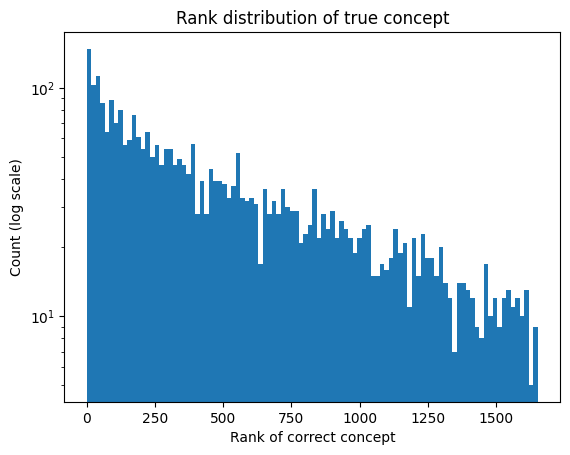

In [ ]:
ranks = compute_true_ranks(
    Z_eeg_test, y_test, Z_proto128, proto_concept_ids
)

import matplotlib.pyplot as plt
plt.hist(ranks, bins=100)
plt.yscale("log")
plt.xlabel("Rank of correct concept")
plt.ylabel("Count (log scale)")
plt.title("Rank distribution of true concept")
plt.show()

In [ ]:
@torch.no_grad()
def inspect_predictions(Z_eeg, y_true, Z_proto, proto_concept_ids, k=10, n_examples=5):
    sim = Z_eeg @ Z_proto.T

    for i in range(n_examples):
        idx = torch.randint(0, Z_eeg.size(0), (1,)).item()
        scores, topk = sim[idx].topk(k)

        true_label = y_true[idx].item()
        preds = proto_concept_ids[topk].tolist()

        print(f"\nEEG sample {idx}")
        print(f"True concept: {true_label}")
        print(f"Top-{k} predicted concepts:")
        print(preds)

In [ ]:
inspect_predictions(
    Z_eeg_test, y_test,
    Z_proto128, proto_concept_ids,
    k=10, n_examples=10
)



EEG sample 1305
True concept: 1132
Top-10 predicted concepts:
[1329, 999, 28, 29, 81, 181, 1521, 855, 71, 917]

EEG sample 860
True concept: 891
Top-10 predicted concepts:
[896, 1598, 999, 982, 855, 1086, 1581, 641, 492, 233]

EEG sample 1925
True concept: 1375
Top-10 predicted concepts:
[1439, 54, 500, 1203, 537, 484, 1262, 823, 1549, 372]

EEG sample 2722
True concept: 1599
Top-10 predicted concepts:
[1566, 1121, 1511, 1373, 1258, 956, 1527, 1441, 1512, 99]

EEG sample 779
True concept: 221
Top-10 predicted concepts:
[1403, 1316, 215, 130, 754, 6, 575, 954, 1536, 1418]

EEG sample 2015
True concept: 871
Top-10 predicted concepts:
[278, 1419, 247, 871, 583, 479, 1089, 1355, 105, 1018]

EEG sample 589
True concept: 853
Top-10 predicted concepts:
[1192, 1244, 1274, 678, 1126, 586, 920, 321, 168, 1302]

EEG sample 2333
True concept: 640
Top-10 predicted concepts:
[1114, 1412, 1175, 1440, 1507, 599, 60, 763, 640, 1513]

EEG sample 1549
True concept: 1570
Top-10 predicted concepts:
[57, 2

In [ ]:
y_test_shuffled = y_test[torch.randperm(y_test.size(0))]

top1_shuf = concept_topk_accuracy(
    Z_eeg_test, y_test_shuffled,
    Z_proto128, proto_concept_ids, K=1
)
top5_shuf = concept_topk_accuracy(
    Z_eeg_test, y_test_shuffled,
    Z_proto128, proto_concept_ids, K=5
)

print("Shuffled Top-1:", top1_shuf)
print("Shuffled Top-5:", top5_shuf)

Shuffled Top-1: 0.0006045949412509799
Shuffled Top-5: 0.0027206772938370705


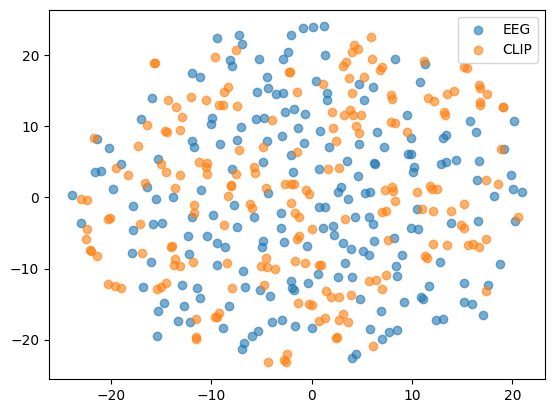

In [ ]:
from sklearn.manifold import TSNE

Z_vis = torch.cat([Z_eeg_test[:200], Z_proto128[:200]], dim=0).cpu().numpy()
labels = ["EEG"] * 200 + ["CLIP"] * 200

Z_2d = TSNE(n_components=2, perplexity=30).fit_transform(Z_vis)

plt.scatter(Z_2d[:200,0], Z_2d[:200,1], label="EEG", alpha=0.6)
plt.scatter(Z_2d[200:,0], Z_2d[200:,1], label="CLIP", alpha=0.6)
plt.legend()
plt.show()

In [ ]:
top1

NameError: name 'top1' is not defined

In [ ]:
import os
from glob import glob

In [ ]:
IMAGE_ROOT = "/content/Image_set_Resize/train_images"

In [ ]:
concept_to_images = {}

In [ ]:
concept_folders = sorted(os.listdir(IMAGE_ROOT))

In [ ]:
for folder in concept_folders:
    concept_id = int(folder.split("_")[0]) - 1  # zero-based
    folder_path = os.path.join(IMAGE_ROOT, folder)
    images = sorted(glob(os.path.join(folder_path, "*.jpg")))
    concept_to_images[concept_id] = images

In [ ]:
import torch
import torch.nn.functional as F

@torch.no_grad()
def build_concept_clip512(concept_to_images):
    """
    Returns:
      concept_to_clip512: dict[int -> torch.Tensor(Nc, 512)] on CPU
    """
    concept_to_clip512 = {}
    for c, paths in concept_to_images.items():
        Z = []
        for p in paths:
            z = get_clip_embedding(p)         # (512,) CPU (from your cache func)
            Z.append(z)
        Z = torch.stack(Z, dim=0)             # (Nc, 512) CPU
        Z = F.normalize(Z, dim=1)
        concept_to_clip512[c] = Z
    return concept_to_clip512

concept_to_clip512 = build_concept_clip512(concept_to_images)
all_concepts = sorted(concept_to_clip512.keys())
print("num concepts:", len(all_concepts))
print("example concept tensor shape:", next(iter(concept_to_clip512.values())).shape)

In [ ]:
import torch
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.allow_tf32 = True
torch.set_float32_matmul_precision("high")

/usr/local/lib/python3.12/dist-packages/torch/backends/__init__.py:46: UserWarning: Please use the new API settings to control TF32 behavior, such as torch.backends.cudnn.conv.fp32_precision = 'tf32' or torch.backends.cuda.matmul.fp32_precision = 'ieee'. Old settings, e.g, torch.backends.cuda.matmul.allow_tf32 = True, torch.backends.cudnn.allow_tf32 = True, allowTF32CuDNN() and allowTF32CuBLAS() will be deprecated after Pytorch 2.9. Please see https://pytorch.org/docs/main/notes/cuda.html#tensorfloat-32-tf32-on-ampere-and-later-devices (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:80.)
  self.setter(val)


In [ ]:
import os
from glob import glob

IMAGE_ROOT = "/content/Image_set_Resize/train_images"

concept_to_images = {}
for folder in sorted(os.listdir(IMAGE_ROOT)):
    concept_id = int(folder.split("_")[0]) - 1
    paths = sorted(glob(os.path.join(IMAGE_ROOT, folder, "*.jpg")))
    concept_to_images[concept_id] = paths

In [ ]:
import torch.nn.functional as F

@torch.no_grad()
def build_concept_clip512(concept_to_images):
    concept_to_clip512 = {}
    for c, paths in concept_to_images.items():
        Z = [get_clip_embedding(p) for p in paths]   # (512,) CPU each
        Z = torch.stack(Z, dim=0)                    # (Nc, 512) CPU
        Z = F.normalize(Z, dim=1)
        concept_to_clip512[c] = Z
    return concept_to_clip512

concept_to_clip512 = build_concept_clip512(concept_to_images)
all_concepts = sorted(concept_to_clip512.keys())

# 🔑 MOVE ONCE TO GPU (key speedup)
concept_to_clip512_gpu = {c: Z.to(device) for c, Z in concept_to_clip512.items()}


In [ ]:
import random

def build_batch_candidates_gpu(batch_labels,
                               concept_to_clip512_gpu,
                               all_concepts,
                               extra_neg_concepts=64):
    # batch_labels: (B,) GPU
    batch_concepts = set(batch_labels.tolist())

    neg_pool = [c for c in all_concepts if c not in batch_concepts]
    sampled = random.sample(neg_pool, k=min(extra_neg_concepts, len(neg_pool)))
    cand_concepts = list(batch_concepts) + sampled

    Z_list, cid_list = [], []
    for c in cand_concepts:
        Zc = concept_to_clip512_gpu[c]                     # (Nc, 512) GPU
        Z_list.append(Zc)
        cid_list.append(torch.full((Zc.size(0),), c,
                                   device=device, dtype=torch.long))

    Zcand512 = torch.cat(Z_list, dim=0)                    # (M, 512) GPU
    cand_concept_ids = torch.cat(cid_list, dim=0)          # (M,) GPU
    return Zcand512, cand_concept_ids

In [ ]:
def multi_positive_infonce(z_eeg, Zcand, cand_concept_ids, batch_labels, temperature=0.07):
    z_eeg = F.normalize(z_eeg, dim=1)        # (B,128)
    Zcand = F.normalize(Zcand, dim=1)        # (M,128)

    logits = (z_eeg @ Zcand.T) / temperature # (B,M)

    pos_mask = (batch_labels[:, None] == cand_concept_ids[None, :])  # (B,M)

    neg_inf = torch.tensor(-1e9, device=logits.device)
    pos_logits = torch.where(pos_mask, logits, neg_inf)

    log_num = torch.logsumexp(pos_logits, dim=1)
    log_den = torch.logsumexp(logits, dim=1)

    return (log_den - log_num).mean()

In [ ]:
import torch.optim as optim

optimizer = optim.AdamW(
    list(model.parameters()) + list(clip_proj.parameters()),
    lr=3e-4,
    weight_decay=1e-4
)

In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_t.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_t.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_t[idx].to(device)      # (B,C,T)
        yb = y_t[idx].to(device)      # (B,)

        z_eeg = model(xb)             # (B,128)

        Zcand512, cand_concept_ids = build_batch_candidates_gpu(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        # Zcand128 = clip_proj(Zcand512)  # (M,128)
        Zcand128 = clip_proj(Zcand512.float())

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_t.size(0):.4f}")

Epoch 1: loss = 1.6852
Epoch 2: loss = 1.4354
Epoch 3: loss = 1.3223
Epoch 4: loss = 1.2352
Epoch 5: loss = 1.1569
Epoch 6: loss = 1.0919
Epoch 7: loss = 1.0359
Epoch 8: loss = 0.9840


In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_t.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_t.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_t[idx].to(device)      # (B,C,T)
        yb = y_t[idx].to(device)      # (B,)

        z_eeg = model(xb)             # (B,128)

        Zcand512, cand_concept_ids = build_batch_candidates_gpu(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        # Zcand128 = clip_proj(Zcand512)  # (M,128)
        Zcand128 = clip_proj(Zcand512.float())

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_t.size(0):.4f}")

Epoch 1: loss = 0.9341
Epoch 2: loss = 0.8910
Epoch 3: loss = 0.8532
Epoch 4: loss = 0.8196
Epoch 5: loss = 0.7876
Epoch 6: loss = 0.7596
Epoch 7: loss = 0.7315
Epoch 8: loss = 0.7087


In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_t.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_t.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_t[idx].to(device)      # (B,C,T)
        yb = y_t[idx].to(device)      # (B,)

        z_eeg = model(xb)             # (B,128)

        Zcand512, cand_concept_ids = build_batch_candidates_gpu(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        # Zcand128 = clip_proj(Zcand512)  # (M,128)
        Zcand128 = clip_proj(Zcand512.float())

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_t.size(0):.4f}")

Epoch 1: loss = 0.6842
Epoch 2: loss = 0.6643
Epoch 3: loss = 0.6456
Epoch 4: loss = 0.6291
Epoch 5: loss = 0.6148
Epoch 6: loss = 0.5972
Epoch 7: loss = 0.5829
Epoch 8: loss = 0.5673


In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_t.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_t.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_t[idx].to(device)      # (B,C,T)
        yb = y_t[idx].to(device)      # (B,)

        z_eeg = model(xb)             # (B,128)

        Zcand512, cand_concept_ids = build_batch_candidates_gpu(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        # Zcand128 = clip_proj(Zcand512)  # (M,128)
        Zcand128 = clip_proj(Zcand512.float())

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_t.size(0):.4f}")

Epoch 1: loss = 0.5554
Epoch 2: loss = 0.5422
Epoch 3: loss = 0.5306
Epoch 4: loss = 0.5186
Epoch 5: loss = 0.5088
Epoch 6: loss = 0.4962
Epoch 7: loss = 0.4919
Epoch 8: loss = 0.4822


In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_t.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_t.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_t[idx].to(device)      # (B,C,T)
        yb = y_t[idx].to(device)      # (B,)

        z_eeg = model(xb)             # (B,128)

        Zcand512, cand_concept_ids = build_batch_candidates_gpu(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        # Zcand128 = clip_proj(Zcand512)  # (M,128)
        Zcand128 = clip_proj(Zcand512.float())

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_t.size(0):.4f}")

Epoch 1: loss = 0.4725
Epoch 2: loss = 0.4630
Epoch 3: loss = 0.4566
Epoch 4: loss = 0.4492
Epoch 5: loss = 0.4409
Epoch 6: loss = 0.4350
Epoch 7: loss = 0.4310
Epoch 8: loss = 0.4237


In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_t.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_t.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_t[idx].to(device)      # (B,C,T)
        yb = y_t[idx].to(device)      # (B,)

        z_eeg = model(xb)             # (B,128)

        Zcand512, cand_concept_ids = build_batch_candidates_gpu(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        # Zcand128 = clip_proj(Zcand512)  # (M,128)
        Zcand128 = clip_proj(Zcand512.float())

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_t.size(0):.4f}")

Epoch 1: loss = 0.4166
Epoch 2: loss = 0.4107
Epoch 3: loss = 0.4047
Epoch 4: loss = 0.4009
Epoch 5: loss = 0.3943
Epoch 6: loss = 0.3902
Epoch 7: loss = 0.3837
Epoch 8: loss = 0.3784


In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_t.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_t.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_t[idx].to(device)      # (B,C,T)
        yb = y_t[idx].to(device)      # (B,)

        z_eeg = model(xb)             # (B,128)

        Zcand512, cand_concept_ids = build_batch_candidates_gpu(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        # Zcand128 = clip_proj(Zcand512)  # (M,128)
        Zcand128 = clip_proj(Zcand512.float())

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_t.size(0):.4f}")

Epoch 1: loss = 0.3736
Epoch 2: loss = 0.3697
Epoch 3: loss = 0.3649
Epoch 4: loss = 0.3615
Epoch 5: loss = 0.3568
Epoch 6: loss = 0.3554
Epoch 7: loss = 0.3495
Epoch 8: loss = 0.3455


In [ ]:
X_test

NameError: name 'X_test' is not defined

In [ ]:
Z_eeg_train = compute_eeg_embeddings(model, X_t)
y_train = y_t.to(device)

NameError: name 'compute_eeg_embeddings' is not defined

In [ ]:
Z_proto512, proto_concept_ids = build_concept_prototypes(concept_to_clip512_gpu)

Z_proto128 = clip_proj(Z_proto512.float())
Z_proto128 = F.normalize(Z_proto128, dim=1)

NameError: name 'build_concept_prototypes' is not defined

In [ ]:
top1_train = concept_topk_accuracy(
    Z_eeg_train, y_train, Z_proto128, proto_concept_ids, K=1
)

NameError: name 'concept_topk_accuracy' is not defined

In [ ]:
import torch
import torch.nn.functional as F

# --------------------------------------------------
# 1) Compute EEG embeddings (train or test)
# --------------------------------------------------
@torch.no_grad()
def compute_eeg_embeddings(model, X, batch_size=64):
    """
    model: EEG encoder
    X: (N, C, T) EEG tensor
    returns: (N, 128) normalized EEG embeddings on GPU
    """
    model.eval()
    Z = []

    for i in range(0, X.size(0), batch_size):
        xb = X[i:i + batch_size].to(device)   # (B,C,T)
        z = model(xb)                          # (B,128)
        z = F.normalize(z, dim=1)              # IMPORTANT
        Z.append(z)

    return torch.cat(Z, dim=0)


# --------------------------------------------------
# 2) Build concept prototypes from CLIP embeddings
# --------------------------------------------------
@torch.no_grad()
def build_concept_prototypes(concept_to_clip512_gpu):
    """
    concept_to_clip512_gpu: dict[c -> (Nc,512)] on GPU

    returns:
      Z_proto512: (C,512) GPU
      proto_concept_ids: (C,) GPU
    """
    Z_list = []
    cid_list = []

    for c, Zc in concept_to_clip512_gpu.items():
        Zmean = Zc.mean(dim=0, keepdim=True)   # (1,512)
        Zmean = F.normalize(Zmean, dim=1)
        Z_list.append(Zmean)
        cid_list.append(c)

    Z_proto512 = torch.cat(Z_list, dim=0)      # (C,512)
    proto_concept_ids = torch.tensor(
        cid_list, device=Z_proto512.device, dtype=torch.long
    )

    return Z_proto512, proto_concept_ids


# --------------------------------------------------
# 3) Concept-level Top-K accuracy
# --------------------------------------------------
@torch.no_grad()
def concept_topk_accuracy(Z_eeg, y_true, Z_proto, proto_concept_ids, K=1):
    """
    Z_eeg: (N,128) EEG embeddings
    y_true: (N,) concept labels
    Z_proto: (C,128) concept prototypes
    proto_concept_ids: (C,)
    """
    sim = Z_eeg @ Z_proto.T                    # (N,C)

    topk_idx = sim.topk(K, dim=1).indices      # (N,K)
    topk_concepts = proto_concept_ids[topk_idx]  # (N,K)

    correct = (topk_concepts == y_true[:, None]).any(dim=1)
    return correct.float().mean().item()

In [ ]:
# Training-set evaluation (sanity check)
Z_eeg_train = compute_eeg_embeddings(model, X_t)
y_train = y_t.to(device)

Z_proto512, proto_concept_ids = build_concept_prototypes(concept_to_clip512_gpu)
Z_proto128 = clip_proj(Z_proto512.float())
Z_proto128 = F.normalize(Z_proto128, dim=1)

top1_train = concept_topk_accuracy(
    Z_eeg_train, y_train, Z_proto128, proto_concept_ids, K=1
)
top5_train = concept_topk_accuracy(
    Z_eeg_train, y_train, Z_proto128, proto_concept_ids, K=5
)

print(f"TRAIN Concept Top-1: {top1_train:.3f}")
print(f"TRAIN Concept Top-5: {top5_train:.3f}")

TRAIN Concept Top-1: 0.917
TRAIN Concept Top-5: 0.977


In [ ]:
N = X_t.size(0)
perm = torch.randperm(N)

split = int(0.8 * N)
train_idx = perm[:split]
test_idx  = perm[split:]

X_train, X_test = X_t[train_idx], X_t[test_idx]
y_train, y_test = y_t[train_idx], y_t[test_idx]

In [ ]:
model = Stage3Encoder(
    T=250, C=63, D=64,
    out_dim=128, n_heads=4
).to(device)

In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_train.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_train.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_train[idx].to(device)      # (B,C,T)
        yb = y_train[idx].to(device)      # (B,)

        z_eeg = model(xb)             # (B,128)

        Zcand512, cand_concept_ids = build_batch_candidates_gpu(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        # Zcand128 = clip_proj(Zcand512)  # (M,128)
        Zcand128 = clip_proj(Zcand512.float())

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_train.size(0):.4f}")

Epoch 1: loss = 5.3437
Epoch 2: loss = 5.1389
Epoch 3: loss = 5.0674
Epoch 4: loss = 4.9924
Epoch 5: loss = 4.9090
Epoch 6: loss = 4.8263
Epoch 7: loss = 4.7569
Epoch 8: loss = 4.7024


In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_train.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_train.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_train[idx].to(device)      # (B,C,T)
        yb = y_train[idx].to(device)      # (B,)

        z_eeg = model(xb)             # (B,128)

        Zcand512, cand_concept_ids = build_batch_candidates_gpu(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        # Zcand128 = clip_proj(Zcand512)  # (M,128)
        Zcand128 = clip_proj(Zcand512.float())

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_train.size(0):.4f}")

Epoch 1: loss = 4.6596
Epoch 2: loss = 4.6179
Epoch 3: loss = 4.5858
Epoch 4: loss = 4.5568
Epoch 5: loss = 4.5302
Epoch 6: loss = 4.5076
Epoch 7: loss = 4.4904
Epoch 8: loss = 4.4703


In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_train.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_train.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_train[idx].to(device)      # (B,C,T)
        yb = y_train[idx].to(device)      # (B,)

        z_eeg = model(xb)             # (B,128)

        Zcand512, cand_concept_ids = build_batch_candidates_gpu(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        # Zcand128 = clip_proj(Zcand512)  # (M,128)
        Zcand128 = clip_proj(Zcand512.float())

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_train.size(0):.4f}")

Epoch 1: loss = 4.4513
Epoch 2: loss = 4.4347
Epoch 3: loss = 4.4193
Epoch 4: loss = 4.4083
Epoch 5: loss = 4.3949
Epoch 6: loss = 4.3819
Epoch 7: loss = 4.3720
Epoch 8: loss = 4.3600


In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_train.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_train.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_train[idx].to(device)      # (B,C,T)
        yb = y_train[idx].to(device)      # (B,)

        z_eeg = model(xb)             # (B,128)

        Zcand512, cand_concept_ids = build_batch_candidates_gpu(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        # Zcand128 = clip_proj(Zcand512)  # (M,128)
        Zcand128 = clip_proj(Zcand512.float())

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_train.size(0):.4f}")

Epoch 1: loss = 4.3519
Epoch 2: loss = 4.3412
Epoch 3: loss = 4.3329
Epoch 4: loss = 4.3201
Epoch 5: loss = 4.3151
Epoch 6: loss = 4.3044
Epoch 7: loss = 4.2979
Epoch 8: loss = 4.2910


In [ ]:
model.train()
clip_proj.train()

temperature = 0.07
extra_neg_concepts = 64

for epoch in range(epochs):
    perm = torch.randperm(X_train.size(0), device=device)
    total_loss = 0.0

    for i in range(0, X_train.size(0), batch_size):
        idx = perm[i:i + batch_size]

        xb = X_train[idx].to(device)      # (B,C,T)
        yb = y_train[idx].to(device)      # (B,)

        z_eeg = model(xb)             # (B,128)

        Zcand512, cand_concept_ids = build_batch_candidates_gpu(
            batch_labels=yb,
            concept_to_clip512_gpu=concept_to_clip512_gpu,
            all_concepts=all_concepts,
            extra_neg_concepts=extra_neg_concepts
        )

        # Zcand128 = clip_proj(Zcand512)  # (M,128)
        Zcand128 = clip_proj(Zcand512.float())

        loss = multi_positive_infonce(
            z_eeg, Zcand128, cand_concept_ids, yb, temperature
        )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch+1}: loss = {total_loss / X_train.size(0):.4f}")

Epoch 1: loss = 4.2850
Epoch 2: loss = 4.2801
Epoch 3: loss = 4.2698
Epoch 4: loss = 4.2665
Epoch 5: loss = 4.2633
Epoch 6: loss = 4.2549
Epoch 7: loss = 4.2484
Epoch 8: loss = 4.2424


In [ ]:
Z_eeg_test = compute_eeg_embeddings(model, X_test)
y_test = y_test.to(device)

top1_test = concept_topk_accuracy(
    Z_eeg_test, y_test, Z_proto128, proto_concept_ids, K=1
)
top5_test = concept_topk_accuracy(
    Z_eeg_test, y_test, Z_proto128, proto_concept_ids, K=5
)

print(f"TEST Concept Top-1: {top1_test:.3f}")
print(f"TEST Concept Top-5: {top5_test:.3f}")

TEST Concept Top-1: 0.000
TEST Concept Top-5: 0.003


In [ ]:
model.eval()

In [ ]:
class ChannelTokenEmbedding(nn.Module):
    """
    Linear token embedding per channel (paper-preferred).
    """
    def __init__(self, T=250, D=64):
        super().__init__()
        self.proj = nn.Linear(T, D)

    def forward(self, x):
        # x: (B, C, T)
        B, C, T = x.shape
        x = x.view(B * C, T)
        z = self.proj(x)
        return z.view(B, C, -1)

In [ ]:
class TemporalSpatialConv(nn.Module):
    """
    Post-attention Temporal-Spatial convolution (paper-style).
    """
    def __init__(self, C=63, D=64, kernel_size=3):
        super().__init__()

        # temporal = depthwise over channels
        self.temporal = nn.Conv1d(
            in_channels=C,
            out_channels=C,
            kernel_size=kernel_size,
            padding=kernel_size // 2,
            groups=C
        )

        # spatial = channel mixing
        self.spatial = nn.Conv1d(
            in_channels=C,
            out_channels=C,
            kernel_size=1
        )

        self.norm = nn.LayerNorm(D)

    def forward(self, x):
        # x: (B, C, D)
        z = self.temporal(x)
        z = self.spatial(z)
        return self.norm(z)

In [ ]:
class TemporalSpatialAggregation(nn.Module):
    """
    Learned aggregation instead of flattening.
    """
    def __init__(self, C, D):
        super().__init__()
        self.agg = nn.Conv1d(C, 1, kernel_size=1)

    def forward(self, x):
        # x: (B, C, D)
        z = self.agg(x)      # (B, 1, D)
        return z.squeeze(1) # (B, D)

In [ ]:
class MLPProjector(nn.Module):
    def __init__(self, D, out_dim):
        super().__init__()
        self.fc1 = nn.Linear(D, out_dim)
        self.fc2 = nn.Linear(out_dim, out_dim)
        self.act = nn.GELU()
        self.norm = nn.LayerNorm(out_dim)

    def forward(self, x):
        z = self.fc1(x)
        z = self.act(z)
        z = z + self.fc2(z)  # residual
        return self.norm(z)

In [ ]:
class Stage3Encoder(nn.Module):
    def __init__(
        self,
        T=250,
        C=63,
        D=64,
        out_dim=512,
        n_heads=4,
        dropout=0.1
    ):
        super().__init__()

        # 1. Token embedding (linear, per channel)
        self.embed = ChannelTokenEmbedding(T, D)

        # 2. Channel-wise Transformer
        self.attn = ChannelSelfAttention(D, n_heads, dropout)

        # 3. Temporal-Spatial Conv (post-attention)
        self.tsconv = TemporalSpatialConv(C, D)

        # 4. Learned aggregation (NO FLATTEN)
        self.agg = TemporalSpatialAggregation(C, D)

        # 5. MLP projector (paper-style)
        self.proj = MLPProjector(D, out_dim)

    def forward(self, x):
        z = self.embed(x)    # (B, C, D)
        z = self.attn(z)     # (B, C, D)
        z = self.tsconv(z)   # (B, C, D)
        z = self.agg(z)      # (B, D)
        z = self.proj(z)     # (B, out_dim)
        return z


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = Stage3Encoder(
    T=250,
    C=63,
    D=64,
    out_dim=512,      # paper-aligned (can later go 1024)
    n_heads=4,
    dropout=0.1
).to(device)

optimizer = optim.AdamW(model.parameters(), lr=3e-4)

In [ ]:
epochs = 8
batch_size = 128

model.train()
for epoch in range(epochs):
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0.0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i + batch_size]
        xb = X_t[idx].to(device)
        yb = y_t[idx].to(device)

        z = model(xb)
        loss = supervised_contrastive_loss(z, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}: loss = {total_loss:.2f}")

Epoch 1: loss = 77.51
Epoch 2: loss = 73.53
Epoch 3: loss = 78.98
Epoch 4: loss = 82.08
Epoch 5: loss = 63.12
Epoch 6: loss = 73.85
Epoch 7: loss = 75.02
Epoch 8: loss = 78.30


In [ ]:
epochs = 8
batch_size = 128

In [ ]:
nn_accs = []

for epoch in range(epochs):
    model.train()
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0.0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i + batch_size]
        xb = X_t[idx].to(device)
        yb = y_t[idx].to(device)

        z = model(xb)
        loss = supervised_contrastive_loss(z, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # ---- evaluation ----
    model.eval()
    with torch.no_grad():
        Z = model(X_t.to(device)).cpu().numpy()
        acc = nearest_neighbor_accuracy(Z, labels)

    nn_accs.append(acc)
    print(f"Epoch {epoch+1}: loss={total_loss:.2f}, NN acc={acc:.4f}")

Epoch 1: loss=77.52, NN acc=0.0015
Epoch 2: loss=74.77, NN acc=0.0021
Epoch 3: loss=73.11, NN acc=0.0021
Epoch 4: loss=76.35, NN acc=0.0028
Epoch 5: loss=69.00, NN acc=0.0030
Epoch 6: loss=72.47, NN acc=0.0029
Epoch 7: loss=68.58, NN acc=0.0034
Epoch 8: loss=68.11, NN acc=0.0032


In [ ]:
centroids = compute_image_centroids(Z, labels)
centroid_acc = centroid_retrieval_accuracy(Z, labels, centroids)

print("Centroid retrieval accuracy:", centroid_acc)
print("Chance level:", 1.0 / len(np.unique(labels)))


Centroid retrieval accuracy: 0.2801692865779927
Chance level: 0.0006045949214026602


In [ ]:
model.eval()
with torch.no_grad():
    Z = model(X_t.to(device)).cpu().numpy()

print("Stage-3 same/diff:",
      same_label_diff_label_test(Z, labels))

print("Stage-3 anchor same/diff:",
      anchor_same_diff_test(Z, labels, n=1000))

Stage-3 same/diff: (np.float32(0.25685835), np.float32(0.09603827))
Stage-3 anchor same/diff: (np.float32(0.25145245), np.float32(0.10432814))


In [ ]:
# build centroids on CPU, detached
centroids = compute_image_centroids(
    z.detach().cpu().numpy(),
    yb.detach().cpu().numpy()
)

proto_loss = 0.0

for zi, yi in zip(z, yb):
    yi_int = int(yi.item())  # 🔴 KEY FIX
    ci = torch.tensor(
        centroids[yi_int],
        device=z.device,
        dtype=z.dtype
    )
    proto_loss += 1 - F.cosine_similarity(zi, ci, dim=0)

proto_loss = proto_loss / len(z)

supcon_loss = supervised_contrastive_loss(z, yb)

In [ ]:
proto_loss = 0.0
count = 0

# group indices by label (within batch)
label_to_indices = {}
for idx, lab in enumerate(yb):
    lab_int = int(lab.item())
    label_to_indices.setdefault(lab_int, []).append(idx)

for i, (zi, yi) in enumerate(zip(z, yb)):
    yi_int = int(yi.item())
    idxs = label_to_indices[yi_int]

    # skip if only one example of this label in batch
    if len(idxs) <= 1:
        continue

    # build LOO centroid
    other_idxs = [j for j in idxs if j != i]
    centroid = z[other_idxs].mean(dim=0)

    proto_loss += 1 - F.cosine_similarity(
        zi, centroid, dim=0
    )
    count += 1

if count > 0:
    proto_loss = proto_loss / count
else:
    proto_loss = torch.tensor(0.0, device=z.device)

In [ ]:
loss = supcon_loss + proto_weight * proto_loss

In [ ]:
epochs = 8
batch_size = 32
proto_weight = 0.1

model.train()
for epoch in range(epochs):
    perm = torch.randperm(X_t.shape[0])
    total_loss = 0.0

    for i in range(0, X_t.shape[0], batch_size):
        idx = perm[i:i + batch_size]
        xb = X_t[idx].to(device)
        yb = y_t[idx].to(device)

        # ---- forward ----
        z = model(xb)

        # 1. supervised contrastive loss
        supcon_loss = supervised_contrastive_loss(z, yb)

        # 2. compute centroids (NON-differentiable)
        centroids = compute_image_centroids(
            z.detach().cpu().numpy(),
            yb.detach().cpu().numpy()
        )

        # 3. prototype loss
        proto_loss = 0.0
        for zi, yi in zip(z, yb):
            yi_int = int(yi.item())
            ci = torch.tensor(
                centroids[yi_int],
                device=z.device,
                dtype=z.dtype
            )
            proto_loss += 1 - F.cosine_similarity(zi, ci, dim=0)

        proto_loss = proto_loss / len(z)

        # 4. total loss
        loss = supcon_loss + proto_weight * proto_loss

        # ---- backward ----
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(
        f"Epoch {epoch+1}: "
        f"loss={total_loss:.2f} | "
        f"supcon={supcon_loss.item():.3f} | "
        f"proto={proto_loss.item():.3f}"
    )

Epoch 1: loss=77.58 | supcon=0.022 | proto=0.000
Epoch 2: loss=79.93 | supcon=0.304 | proto=0.008
Epoch 3: loss=75.94 | supcon=0.021 | proto=-0.000
Epoch 4: loss=79.46 | supcon=0.016 | proto=0.000
Epoch 5: loss=70.35 | supcon=0.019 | proto=0.000
Epoch 6: loss=65.86 | supcon=0.012 | proto=-0.000
Epoch 7: loss=74.12 | supcon=0.011 | proto=-0.000
Epoch 8: loss=63.64 | supcon=0.595 | proto=0.017
